In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I import the data relating provinces surface

In [6]:
df = pd.read_csv('Data/demographic_data/SuperficieProvinceItalia.csv')

df = df[df['Tipo dato']=='superficie (kmq)']
df = df.groupby(by=['Territorio', 'ITTER107']).sum()['Value']
df = df.reset_index()


In [7]:
x = pd.read_csv('Data/demographic_data/Popolazione&MortiProvince2017.csv')


In [8]:
tabMorti = x[(x.Sesso=='totale') & (x['Seleziona periodo']=='2017')& (x.TIPO_DATO15 == 'DEATH')].loc[:,('Value', 'ITTER107')]

In [9]:
tabPop   = x[(x.Sesso=='totale') & (x['Seleziona periodo']=='2017')& (x.TIPO_DATO15 == 'BEG')].loc[:,('Value', 'ITTER107')]

In [10]:
df = df.merge(tabMorti, left_on='ITTER107' , right_on='ITTER107' , how='left')

In [11]:
df = df.merge(tabPop, left_on='ITTER107' , right_on='ITTER107' , how='left')

In [12]:
df.columns=['Territorio', 'ITTER107', 'Superficie/kmq', 'Morti', 'Popolazione']

In [13]:
df[df.ITTER107.apply(lambda x: len(x))==5]

Territorio ITTER107  Superficie/kmq   Morti  Popolazione
1        Agrigento    ITG14       3052.8193  5117.0     442049.0
2      Alessandria    ITC18       3558.7845  6257.0     426658.0
3           Ancona    ITE32       1963.2132  5648.0     474124.0
4           Arezzo    ITE18       3232.9925  4075.0     344374.0
5    Ascoli Piceno    ITE34       1228.1883  2532.0     209450.0
..             ...      ...             ...     ...          ...
130       Vercelli    ITC12       2081.6015  2562.0     173868.0
131         Verona    ITD31       3096.2799  9096.0     921557.0
132  Vibo Valentia    ITF64       1150.6203  1651.0     161619.0
133        Vicenza    ITD32       2722.4494  8211.0     865082.0
134        Viterbo    ITE41       3615.1638  3981.0     319008.0

[107 rows x 5 columns]

In [14]:
df[df.ITTER107.apply(lambda x: len(x))==4]

Territorio ITTER107  Superficie/kmq    Morti  \
0                               Abruzzo     ITF1      10831.4962  15484.0   
10                           Basilicata     ITF5      10073.1104   6495.0   
20                             Calabria     ITF6      15221.6141  20803.0   
22                             Campania     ITF3      13670.5970  56294.0   
34                       Emilia-Romagna     ITD5      22444.5427  51064.0   
41                Friuli-Venezia Giulia     ITD4       7932.4817  14506.0   
53                                Lazio     ITE4      17231.7234  59951.0   
56                              Liguria     ITC3       5416.1520  22134.0   
59                            Lombardia     ITC4      23863.0974  99335.0   
63                               Marche     ITE3       9401.1833  18449.0   
69                               Molise     ITF2       4460.4366   3855.0   
85                             Piemonte     ITC1      25386.6969  53541.0   
91   Provincia Autonoma Bolzano / Bozen     ITD1       7397.8575   4395.0   
92            Provincia Autonoma Trento     ITD2       6206.8641   5062.0   
93                               Puglia     ITF4      19540.5177  40351.0   
103                            Sardegna     ITG2      24099.4528  16773.0   
106                             Sicilia     ITG1      25832.5454  54358.0   
116                             Toscana     ITE1      22987.4373  44521.0   
118      Trentino Alto Adige / Südtirol     ITDA      13604.7216      NaN   
123                              Umbria     ITE2       8464.2231  10789.0   
124      Valle d'Aosta / Vallée d'Aoste     ITC2       3260.8542   1454.0   
127                              Veneto     ITD3      18345.3690  49447.0   

     Popolazione  
0      1322247.0  
10      570365.0  
20     1965128.0  
22     5839084.0  
34     4448841.0  
41     1217872.0  
53     5898124.0  
56     1565307.0  
59    10019166.0  
63     1538055.0  
69      310449.0  
85     4392526.0  
91      524256.0  
92      538604.0  
93     4063888.0  
103    1653135.0  
106    5056641.0  
116    3742437.0  
118          NaN  
123     888908.0  
124     126883.0  
127    4907529.0

In [15]:
dfMA = pd.read_csv('Data/demographic_data/EtaMediaProvince2017.csv', index_col=0)
df = df.merge(dfMA, left_on='ITTER107' , right_on='ITTER107', how='left').drop(['Territorio_y','Popolazione_y','ExP'], axis=1)

In [16]:
df['DensityPop/kmq'] = round(df.iloc[:,4]/df.iloc[:,2],0)

In [17]:
df

Territorio_x ITTER107  Superficie/kmq    Morti  Popolazione_x  MeanAge  \
0          Abruzzo     ITF1      10831.4962  15484.0      1322247.0     45.2   
1        Agrigento    ITG14       3052.8193   5117.0       442049.0     43.4   
2      Alessandria    ITC18       3558.7845   6257.0       426658.0     47.8   
3           Ancona    ITE32       1963.2132   5648.0       474124.0     45.7   
4           Arezzo    ITE18       3232.9925   4075.0       344374.0     46.0   
..             ...      ...             ...      ...            ...      ...   
130       Vercelli    ITC12       2081.6015   2562.0       173868.0     47.4   
131         Verona    ITD31       3096.2799   9096.0       921557.0     44.0   
132  Vibo Valentia    ITF64       1150.6203   1651.0       161619.0     43.3   
133        Vicenza    ITD32       2722.4494   8211.0       865082.0     43.8   
134        Viterbo    ITE41       3615.1638   3981.0       319008.0     45.5   

     PercOver65  DensityPop/kmq  
0          28.3           122.0  
1          26.2           145.0  
2          32.6           120.0  
3          29.4           242.0  
4          29.8           107.0  
..          ...             ...  
130        32.1            84.0  
131        26.2           298.0  
132        26.0           140.0  
133        25.9           318.0  
134        28.6            88.0  

[135 rows x 8 columns]

In [18]:
dfcause = pd.read_csv('Data/demographic_data/CauseMorteProvinceItalia2017.csv')
dfcause[(dfcause.CAUSEMORTE_SL.apply(lambda x: '8' in x ))&
        (dfcause.Sesso=='totale')&
        (dfcause.CAUSEMORTE_SL.apply(lambda x: len(x)==3 ))&
        (dfcause.ITTER107.apply(lambda x: len(x)==5))].sort_values('Value',ascending=False).head(30)

ITTER107 Territorio TIPO_DATO15 Tipo dato  SEXISTAT1   Sesso  \
19155    ITE43       Roma       DEATH     morti          9  totale   
23185    ITF33     Napoli       DEATH     morti          9  totale   
19153    ITE43       Roma       DEATH     morti          9  totale   
5746     ITC45     Milano       DEATH     morti          9  totale   
1895     ITC11     Torino       DEATH     morti          9  totale   
19160    ITE43       Roma       DEATH     morti          9  totale   
5592     ITC45     Milano       DEATH     morti          9  totale   
1949     ITC11     Torino       DEATH     morti          9  totale   
5749     ITC45     Milano       DEATH     morti          9  totale   
24678    ITF45      Lecce       DEATH     morti          9  totale   
12471    ITD55    Bologna       DEATH     morti          9  totale   
23439    ITF35    Salerno       DEATH     morti          9  totale   
27946    ITG12    Palermo       DEATH     morti          9  totale   
1567     ITC11     Torino       DEATH     morti          9  totale   
24265    ITF42       Bari       DEATH     morti          9  totale   
15095    ITE14    Firenze       DEATH     morti          9  totale   
23191    ITF33     Napoli       DEATH     morti          9  totale   
4323     ITC33     Genova       DEATH     morti          9  totale   
7374     ITC47    Brescia       DEATH     morti          9  totale   
15092    ITE14    Firenze       DEATH     morti          9  totale   
5107     ITC41     Varese       DEATH     morti          9  totale   
12469    ITD55    Bologna       DEATH     morti          9  totale   
28886    ITG17    Catania       DEATH     morti          9  totale   
17589    ITE21    Perugia       DEATH     morti          9  totale   
6345     ITC46    Bergamo       DEATH     morti          9  totale   
9972     ITD36     Padova       DEATH     morti          9  totale   
15104    ITE14    Firenze       DEATH     morti          9  totale   
22335    ITF31    Caserta       DEATH     morti          9  totale   
27834    ITG13    Messina       DEATH     morti          9  totale   
6651     ITC47    Brescia       DEATH     morti          9  totale   

      CAUSEMORTE_SL   Causa iniziale di morte - European Short List  TIME  \
19155           8_3  malattie croniche delle basse vie respiratorie  2017   
23185           8_3  malattie croniche delle basse vie respiratorie  2017   
19153           8_2                                       polmonite  2017   
5746            8_3  malattie croniche delle basse vie respiratorie  2017   
1895            8_3  malattie croniche delle basse vie respiratorie  2017   
19160           8_4         altre malattie del sistema respiratorio  2017   
5592            8_2                                       polmonite  2017   
1949            8_2                                       polmonite  2017   
5749            8_4         altre malattie del sistema respiratorio  2017   
24678           8_3  malattie croniche delle basse vie respiratorie  2017   
12471           8_3  malattie croniche delle basse vie respiratorie  2017   
23439           8_3  malattie croniche delle basse vie respiratorie  2017   
27946           8_3  malattie croniche delle basse vie respiratorie  2017   
1567            8_4         altre malattie del sistema respiratorio  2017   
24265           8_3  malattie croniche delle basse vie respiratorie  2017   
15095           8_3  malattie croniche delle basse vie respiratorie  2017   
23191           8_4         altre malattie del sistema respiratorio  2017   
4323            8_3  malattie croniche delle basse vie respiratorie  2017   
7374            8_3  malattie croniche delle basse vie respiratorie  2017   
15092           8_2                                       polmonite  2017   
5107            8_3  malattie croniche delle basse vie respiratorie  2017   
12469           8_2                                       polmonite  2017   
28886           8_3  malattie croniche delle basse vie respirato

In [19]:
dfcause = dfcause[dfcause['Sesso']=='totale']

In [20]:
dfcause = dfcause[dfcause.CAUSEMORTE_SL.apply(lambda x: len(x)==1)]

In [21]:
listacausemorte = dfcause['Causa iniziale di morte - European Short List'].unique()
codicecausemorte = dfcause[dfcause.CAUSEMORTE_SL.apply(lambda x: len(x)==1)].CAUSEMORTE_SL.unique()

dfx = dfcause.iloc[:,[0,1,5]].groupby(['ITTER107','Territorio','Sesso']).sum()
dfx = dfx.reset_index()

In [22]:
for prov in dfcause.ITTER107.unique():
    for i,ix in zip (listacausemorte, codicecausemorte):
       # print('{}{}'.format(prov,i))
        dfx.loc[dfx.ITTER107==prov,'{} - {}'.format(ix,i)] = dfcause.loc[((dfcause.ITTER107==prov)&(dfcause.Sesso=='totale')&(dfcause.CAUSEMORTE_SL==ix)),'Value'].values[0]
        
dfx

ITTER107             Territorio   Sesso  \
0         IT                 Italia  totale   
1      IT108  Monza e della Brianza  totale   
2      IT109                  Fermo  totale   
3      IT110  Barletta-Andria-Trani  totale   
4      IT111           Sud Sardegna  totale   
..       ...                    ...     ...   
128     ITG2               Sardegna  totale   
129    ITG25                Sassari  totale   
130    ITG26                  Nuoro  totale   
131    ITG27               Cagliari  totale   
132    ITG28               Oristano  totale   

     7 - malattie del sistema circolatorio  \
0                                 232992.0   
1                                   2046.0   
2                                    809.0   
3                                   1141.0   
4                                   1018.0   
..                                     ...   
128                                 5164.0   
129                                 1461.0   
130                                  772.0   
131                                 1328.0   
132                                  585.0   

     1 - alcune malattie infettive e parassitarie  2 - tumori  \
0                                         14070.0    180085.0   
1                                           177.0      2549.0   
2                                            52.0       499.0   
3                                           104.0       878.0   
4                                            61.0       901.0   
..                                            ...         ...   
128                                         395.0      5006.0   
129                                         135.0      1391.0   
130                                          46.0       681.0   
131                                         115.0      1584.0   
132                                          38.0       449.0   

     5 - disturbi psichici e comportamentali  \
0                                    24406.0   
1                                      279.0   
2                                       94.0   
3                                       75.0   
4                                      249.0   
..                                       ...   
128                                    901.0   
129                                    162.0   
130                                     88.0   
131                                    296.0   
132                                    106.0   

     9 - malattie dell'apparato digerente  \
0                                 23261.0   
1                                   243.0   
2                                    80.0   
3                                   144.0   
4                                   113.0   
..                                    ...   
128                                 666.0   
129                                 199.0   
130                                 100.0   
131                                 195.0   
132                                  59.0   

     8 - malattie del sistema respiratorio  \
0                                  53372.0   
1                                    598.0   
2                                    160.0   
3                                    307.0   
4                                    305.0   
..                                     ...   
128                                 1228.0   
129                                  341.0   
130                                  148.0   
131                                  313.0   
132                                  121.0   

     6 - malattie del sistema nervoso e degli organi di senso  \
0                                              30672.0          
1                                                403.0          
2                                                143.0          
3                                                154.0          
4                                                137.0          
..                                          

In [23]:
df = df.merge(dfx, left_on='ITTER107', right_on='ITTER107', how='left')

In [24]:
df = df.drop(['Territorio', 'Sesso'], axis=1)

## Add air pollution data

In [27]:
ap_prov =  pd.read_excel('Data/air_pollution_data/Tabella 2.xlsx', header=1)
ap_prov.head(3)

Region_id  Province_id  Municipality_id  Observation_id  Station_code  \
0        1.0            1          1001028           30068        100114   
1        1.0            1          1001078           30246        100171   
2        1.0            1          1001125           30177        100165   

  Station_eu_code   Regione Provincia            Comune  Nome della stazione  \
0         IT1128A  Piemonte    Torino  Borgaro Torinese  Borgaro T. - Caduti   
1         IT2101A  Piemonte    Torino            Chieri    Chieri - Bersezio   
2         IT1788A  Piemonte    Torino             Ivrea  Ivrea - Liberazione   

   ... Tipo di stazione Tecnica di misura Valore medio annuo1,3 [µg/m³]  \
0  ...       background                 g                            27   
1  ...       background                 g                            27   
2  ...       background                 g                            24   

  50° percentile1 [µg/m3] 75° percentile2 [µg/m3] 98°  percentile2 [µg/m3]  \
0                      20                      38                       81   
1                      18                      39                       82   
2                      16                      33                       81   

  99,2° percentile2 [µg/m3] Valore massimo2 [µg/m3] Numero di dati validi  \
0                        94                     158                   348   
1                        85                      97                   341   
2                        95                     104                   350   

   AQD used4  
0          t  
1          t  
2          t  

[3 rows x 21 columns]

In [28]:
ap_prov[ap_prov['50° percentile1 [µg/m3]'].str.contains('-', na=False)]
ap_prov.drop(ap_prov[ap_prov['50° percentile1 [µg/m3]']=='-'].index, inplace=True)
ap_prov['50° percentile1 [µg/m3]']=pd.to_numeric(ap_prov['50° percentile1 [µg/m3]'])

ap_prov[ap_prov['75° percentile2 [µg/m3]'].str.contains('-', na=False)]
ap_prov.drop(ap_prov[ap_prov['75° percentile2 [µg/m3]']=='-'].index, inplace=True)
ap_prov['75° percentile2 [µg/m3]']=pd.to_numeric(ap_prov['75° percentile2 [µg/m3]'])

dfair = ap_prov.groupby(by='Provincia').max()
dfair.reset_index(inplace=True)
dfair.head(3)

Provincia  Region_id  Province_id  Municipality_id  Observation_id  \
0    Agrigento       19.0           84         19084028           28500   
1  Alessandria        1.0            6          1006066           30225   
2       Ancona       11.0           42         11042020           28202   

   Station_code Station_eu_code   Regione           Comune  \
0       1908498         IT2281A   Sicilia  Porto Empedocle   
1        100614         IT1904A  Piemonte          Dernice   
2       1104226         IT1827A    Marche            Genga   

             Nome della stazione  ... Tipo di stazione Tecnica di misura  \
0                Porto Empedocle  ...       background                 b   
1                Dernice - Costa  ...       background                 g   
2  Genga -Parco Gola della Rossa  ...       industrial                 b   

  Valore medio annuo1,3 [µg/m³]  50° percentile1 [µg/m3]  \
0                            15                13.900000   
1                            26                17.000000   
2                            15                11.266667   

   75° percentile2 [µg/m3]  98°  percentile2 [µg/m3]  \
0                20.000000                 32.799992   
1                36.000000                 81.000000   
2                17.820833                 49.808333   

   99,2° percentile2 [µg/m3]  Valore massimo2 [µg/m3]  Numero di dati validi  \
0                  37.000000                53.400002                    318   
1                  87.000000               117.000000                    364   
2                  51.670833                56.462500                    347   

   AQD used4  
0          t  
1          t  
2          t  

[3 rows x 21 columns]

In [29]:
a = dfair.Provincia.unique()
b = df[df.ITTER107.apply(lambda x: len(x))==5].Territorio_x.unique()

(set(a).difference(b))

{'Aosta', 'Bolzano', 'Carbonia-Iglesias', 'Forlì -Cesena', 'Massa Carrara'}

In [30]:
(set(b).difference(a))

{'Bolzano / Bozen',
 'Caltanissetta',
 'Campobasso',
 'Catania',
 'Enna',
 'Fermo',
 'Forlì-Cesena',
 'Imperia',
 'Isernia',
 'Massa-Carrara',
 'Matera',
 'Messina',
 'Palermo',
 'Ragusa',
 'Sud Sardegna',
 'Trapani',
 "Valle d'Aosta / Vallée d'Aoste"}

In [31]:
# Checking wrong name between two datasets
lista_air  =['Aosta', 'Bolzano', 'Forlì -Cesena', 'Massa Carrara','Carbonia-Iglesias']
lista_nuovi_nomi= ["Valle d'Aosta / Vallée d'Aoste",'Bolzano / Bozen','Forlì-Cesena','Massa-Carrara','Sud Sardegna']
for i in np.arange(len(lista_air)):
    dfair = dfair.replace(lista_air[i],lista_nuovi_nomi[i])

In [32]:
dfair.head(2)

Provincia  Region_id  Province_id  Municipality_id  Observation_id  \
0    Agrigento       19.0           84         19084028           28500   
1  Alessandria        1.0            6          1006066           30225   

   Station_code Station_eu_code   Regione           Comune  \
0       1908498         IT2281A   Sicilia  Porto Empedocle   
1        100614         IT1904A  Piemonte          Dernice   

  Nome della stazione  ... Tipo di stazione Tecnica di misura  \
0     Porto Empedocle  ...       background                 b   
1     Dernice - Costa  ...       background                 g   

  Valore medio annuo1,3 [µg/m³]  50° percentile1 [µg/m3]  \
0                            15                     13.9   
1                            26                     17.0   

   75° percentile2 [µg/m3]  98°  percentile2 [µg/m3]  \
0                     20.0                 32.799992   
1                     36.0                 81.000000   

   99,2° percentile2 [µg/m3]  Valore massimo2 [µg/m3]  Numero di dati validi  \
0                       37.0                53.400002                    318   
1                       87.0               117.000000                    364   

   AQD used4  
0          t  
1          t  

[2 rows x 21 columns]

In [33]:
dfair = dfair.loc[:,('Provincia','Regione','Valore medio annuo1,3 [µg/m³]', '50° percentile1 [µg/m3]','75° percentile2 [µg/m3]')]
dfair

Provincia        Regione  \
0                        Agrigento        Sicilia   
1                      Alessandria       Piemonte   
2                           Ancona         Marche   
3   Valle d'Aosta / Vallée d'Aoste  Valle d'Aosta   
4                           Arezzo        Toscana   
..                             ...            ...   
90                        Vercelli       Piemonte   
91                          Verona         Veneto   
92                   Vibo Valentia       Calabria   
93                         Vicenza         Veneto   
94                         Viterbo          Lazio   

    Valore medio annuo1,3 [µg/m³]  50° percentile1 [µg/m3]  \
0                              15                13.900000   
1                              26                17.000000   
2                              15                11.266667   
3                              14                10.000000   
4                              13                10.000000   
..                            ...                      ...   
90                             24                17.083333   
91                             23                18.000000   
92                             11                 9.970000   
93                             28                20.000000   
94                             11                10.000000   

    75° percentile2 [µg/m3]  
0                 20.000000  
1                 36.000000  
2                 17.820833  
3                 19.000000  
4                 15.000000  
..                      ...  
90                34.625000  
91                28.000000  
92                15.420000  
93                39.000000  
94                13.000000  

[95 rows x 5 columns]

### Merging datasets

In [34]:
df = df.merge(dfair, left_on='Territorio_x', right_on='Provincia', how='left')

In [35]:
df.head(1)

Territorio_x ITTER107  Superficie/kmq    Morti  Popolazione_x  MeanAge  \
0      Abruzzo     ITF1      10831.4962  15484.0      1322247.0     45.2   

   PercOver65  DensityPop/kmq  7 - malattie del sistema circolatorio  \
0        28.3           122.0                                 6205.0   

   1 - alcune malattie infettive e parassitarie  ...  \
0                                         283.0  ...   

   9 - malattie dell'apparato digerente  \
0                                 620.0   

   8 - malattie del sistema respiratorio  \
0                                 1189.0   

   6 - malattie del sistema nervoso e degli organi di senso  \
0                                              868.0          

   4 - malattie endocrine, nutrizionali e metaboliche  \
0                                              740.0    

   3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
0                                               87.0                                                 

   Provincia  Regione Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
0        NaN      NaN                           NaN                     NaN   

   75° percentile2 [µg/m3]  
0                      NaN  

[1 rows x 22 columns]

In [36]:
province = df[df.ITTER107.apply(lambda x: len(x)==5)].drop('Provincia', axis=1)
province.reset_index(inplace=True)
province.head(3)

index Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
0      1    Agrigento    ITG14       3052.8193  5117.0       442049.0   
1      2  Alessandria    ITC18       3558.7845  6257.0       426658.0   
2      3       Ancona    ITE32       1963.2132  5648.0       474124.0   

   MeanAge  PercOver65  DensityPop/kmq  7 - malattie del sistema circolatorio  \
0     43.4        26.2           145.0                                 1978.0   
1     47.8        32.6           120.0                                 2407.0   
2     45.7        29.4           242.0                                 2108.0   

   ...  5 - disturbi psichici e comportamentali  \
0  ...                                    177.0   
1  ...                                    302.0   
2  ...                                    237.0   

   9 - malattie dell'apparato digerente  \
0                                 114.0   
1                                 201.0   
2                                 229.0   

   8 - malattie del sistema respiratorio  \
0                                  349.0   
1                                  458.0   
2                                  461.0   

   6 - malattie del sistema nervoso e degli organi di senso  \
0                                              193.0          
1                                              324.0          
2                                              442.0          

   4 - malattie endocrine, nutrizionali e metaboliche  \
0                                              380.0    
1                                              255.0    
2                                              243.0    

   3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
0                                               22.0                                                 
1                                               25.0                                                 
2                                               27.0                                                 

    Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
0   Sicilia                           15.0               13.900000   
1  Piemonte                           26.0               17.000000   
2    Marche                           15.0               11.266667   

   75° percentile2 [µg/m3]  
0                20.000000  
1                36.000000  
2                17.820833  

[3 rows x 22 columns]

In [37]:
province[province.MeanAge.isna()]

index  Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
88    111  Sud Sardegna    IT111       6530.6728  3942.0       356014.0   

    MeanAge  PercOver65  DensityPop/kmq  \
88      NaN         NaN            55.0   

    7 - malattie del sistema circolatorio  ...  \
88                                 1018.0  ...   

    5 - disturbi psichici e comportamentali  \
88                                    249.0   

    9 - malattie dell'apparato digerente  \
88                                 113.0   

    8 - malattie del sistema respiratorio  \
88                                  305.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
88                                              137.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
88                                              145.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
88                                               17.0                                                 

     Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
88  Sardegna                           14.0                    12.7   

    75° percentile2 [µg/m3]  
88                     16.3  

[1 rows x 22 columns]

In [38]:
province.loc[province.ITTER107=='IT111','MeanAge'] = province[province.Territorio_x=='Cagliari']['MeanAge'].values[0]
province.loc[province.ITTER107=='IT111','PercOver65'] = province[province.Territorio_x=='Cagliari']['PercOver65'].values[0]
province[province.ITTER107=='IT111']

index  Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
88    111  Sud Sardegna    IT111       6530.6728  3942.0       356014.0   

    MeanAge  PercOver65  DensityPop/kmq  \
88     45.2        27.0            55.0   

    7 - malattie del sistema circolatorio  ...  \
88                                 1018.0  ...   

    5 - disturbi psichici e comportamentali  \
88                                    249.0   

    9 - malattie dell'apparato digerente  \
88                                 113.0   

    8 - malattie del sistema respiratorio  \
88                                  305.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
88                                              137.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
88                                              145.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
88                                               17.0                                                 

     Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
88  Sardegna                           14.0                    12.7   

    75° percentile2 [µg/m3]  
88                     16.3  

[1 rows x 22 columns]

In [39]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 22 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   index                                                                                            107 non-null    int64  
 1   Territorio_x                                                                                     107 non-null    object 
 2   ITTER107                                                                                         107 non-null    object 
 3   Superficie/kmq                                                                                   107 non-null    float64
 4   Morti                                                                                            107 non-null    float64
 5   Popolazi

In [40]:
province[province.Regione=='Sicilia']

index Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
0       1    Agrigento    ITG14       3052.8193  5117.0       442049.0   
86    108     Siracusa    ITG19       2124.1927  4229.0       402822.0   

    MeanAge  PercOver65  DensityPop/kmq  \
0      43.4        26.2           145.0   
86     43.2        25.6           190.0   

    7 - malattie del sistema circolatorio  ...  \
0                                  1978.0  ...   
86                                 1602.0  ...   

    5 - disturbi psichici e comportamentali  \
0                                     177.0   
86                                    158.0   

    9 - malattie dell'apparato digerente  \
0                                  114.0   
86                                 155.0   

    8 - malattie del sistema respiratorio  \
0                                   349.0   
86                                  313.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
0                                               193.0          
86                                              110.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
0                                               380.0    
86                                              260.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
0                                                22.0                                                 
86                                               11.0                                                 

    Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
0   Sicilia                           15.0                    13.9   
86  Sicilia                           13.0                    12.4   

    75° percentile2 [µg/m3]  
0                      20.0  
86                     15.4  

[2 rows x 22 columns]

In [41]:
province.loc[province.ITTER107.apply(lambda x: 'ITG1' in x),'Regione']= 'Sicilia'
province.loc[(province.ITTER107.apply(lambda x: 'ITG1' in x))&(province['Valore medio annuo1,3 [µg/m³]'].isna()) , 'Valore medio annuo1,3 [µg/m³]'] = 14
province.loc[(province.ITTER107.apply(lambda x: 'ITG1' in x))&(province['50° percentile1 [µg/m3]'].isna()) ,'50° percentile1 [µg/m3]'] = 13
province.loc[(province.ITTER107.apply(lambda x: 'ITG1' in x))&(province['75° percentile2 [µg/m3]'].isna()),'75° percentile2 [µg/m3]'] = 18
province[province.ITTER107.apply(lambda x: 'ITG1' in x)]

index   Territorio_x ITTER107  Superficie/kmq    Morti  Popolazione_x  \
0       1      Agrigento    ITG14       3052.8193   5117.0       442049.0   
18     21  Caltanissetta    ITG15       2138.4681   3004.0       269710.0   
21     25        Catania    ITG17       3573.5114  11000.0      1113303.0   
29     35           Enna    ITG16       2574.6664   2039.0       168052.0   
53     66        Messina    ITG13       3266.0745   7712.0       636653.0   
62     78        Palermo    ITG12       5009.2083  13081.0      1268217.0   
74     94         Ragusa    ITG18       1623.9089   3214.0       321359.0   
86    108       Siracusa    ITG19       2124.1927   4229.0       402822.0   
93    117        Trapani    ITG11       2469.6958   4962.0       434476.0   

    MeanAge  PercOver65  DensityPop/kmq  \
0      43.4        26.2           145.0   
18     42.6        25.0           126.0   
21     42.0        23.8           312.0   
29     44.1        27.3            65.0   
53     44.7        27.6           195.0   
62     42.5        24.8           253.0   
74     42.3        24.3           198.0   
86     43.2        25.6           190.0   
93     43.9        27.0           176.0   

    7 - malattie del sistema circolatorio  ...  \
0                                  1978.0  ...   
18                                 1200.0  ...   
21                                 4417.0  ...   
29                                  817.0  ...   
53                                 3267.0  ...   
62                                 5047.0  ...   
74                                 1350.0  ...   
86                                 1602.0  ...   
93                                 1764.0  ...   

    5 - disturbi psichici e comportamentali  \
0                                     177.0   
18                                     89.0   
21                                    331.0   
29                                     44.0   
53                                    206.0   
62                                    517.0   
74                                     92.0   
86                                    158.0   
93                                    248.0   

    9 - malattie dell'apparato digerente  \
0                                  114.0   
18                                  93.0   
21                                 339.0   
29                                  52.0   
53                                 236.0   
62                                 469.0   
74                                 113.0   
86                                 155.0   
93                                 127.0   

    8 - malattie del sistema respiratorio  \
0                                   349.0   
18                                  241.0   
21                                  772.0   
29                                  226.0   
53                                  602.0   
62                                 1055.0   
74                                  198.0   
86                                  313.0   
93                                  393.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
0                                               193.0          
18                                              147.0          
21                                              437.0          
29                                               88.0          
53                                              253.0          
62                                              549.0          
74                                              132.0          
86                                              110.0          
93                                              222.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
0                                               380.0    
18                                              177.0    
21                                              726.0    
29                                              118.0    
53     

In [42]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 22 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   index                                                                                            107 non-null    int64  
 1   Territorio_x                                                                                     107 non-null    object 
 2   ITTER107                                                                                         107 non-null    object 
 3   Superficie/kmq                                                                                   107 non-null    float64
 4   Morti                                                                                            107 non-null    float64
 5   Popolazi

In [43]:
province[province['Valore medio annuo1,3 [µg/m³]'].isna()]

index Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
19     23   Campobasso    ITF22       2925.2810  2747.0       224644.0   
30     36        Fermo    IT109        862.7532  2335.0       174849.0   
39     46      Imperia    ITC31       1154.7604  2966.0       215130.0   
40     47      Isernia    ITF21       1535.1556  1108.0        85805.0   
52     65       Matera    ITF52       3478.8356  2094.0       199685.0   

    MeanAge  PercOver65  DensityPop/kmq  \
19     45.6        29.0            77.0   
30     45.9        29.6           203.0   
39     47.9        33.0           186.0   
40     46.2        29.8            56.0   
52     44.2        26.9            57.0   

    7 - malattie del sistema circolatorio  ...  \
19                                 1086.0  ...   
30                                  809.0  ...   
39                                  974.0  ...   
40                                  579.0  ...   
52                                  858.0  ...   

    5 - disturbi psichici e comportamentali  \
19                                     59.0   
30                                     94.0   
39                                    106.0   
40                                     28.0   
52                                     48.0   

    9 - malattie dell'apparato digerente  \
19                                 117.0   
30                                  80.0   
39                                 113.0   
40                                  35.0   
52                                  92.0   

    8 - malattie del sistema respiratorio  \
19                                  194.0   
30                                  160.0   
39                                  256.0   
40                                   78.0   
52                                  139.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
19                                              129.0          
30                                              143.0          
39                                              158.0          
40                                               37.0          
52                                               72.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
19                                              123.0    
30                                               87.0    
39                                              165.0    
40                                               67.0    
52                                              117.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
19                                               11.0                                                 
30                                               10.0                                                 
39                                               12.0                                                 
40                                                7.0                                                 
52                                                6.0                                                 

    Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
19      NaN                            NaN                     NaN   
30      NaN                            NaN                     NaN   
39      NaN                            NaN                     NaN   
40      NaN                            NaN                     NaN   
52      NaN                            NaN                     NaN   

    75° percentile2 [µg/m3]  
19                      NaN  
30                      NaN  
39                      NaN  
40                      NaN  
52                      NaN  

[5 rows x 22 columns]

In [44]:
province.loc[province.ITTER107.apply(lambda x: 'ITC3' in x),'Regione'] = 'Liguria'
province.loc[(province.ITTER107.apply(lambda x: 'ITC3' in x))&(province['Valore medio annuo1,3 [µg/m³]'].isna()) , 'Valore medio annuo1,3 [µg/m³]'] = 17.3
province.loc[(province.ITTER107.apply(lambda x: 'ITC3' in x))&(province['50° percentile1 [µg/m3]'].isna()) ,'50° percentile1 [µg/m3]'] = 16
province.loc[(province.ITTER107.apply(lambda x: 'ITC3' in x))&(province['75° percentile2 [µg/m3]'].isna()),'75° percentile2 [µg/m3]'] = 21.3
province.loc[province.ITTER107.apply(lambda x: 'ITC3' in x),:]

index Territorio_x ITTER107  Superficie/kmq    Morti  Popolazione_x  \
36     43       Genova    ITC33       1833.7472  12142.0       850071.0   
39     46      Imperia    ITC31       1154.7604   2966.0       215130.0   
42     51    La Spezia    ITC34        881.3788   2997.0       220698.0   
84    105       Savona    ITC32       1546.2656   4029.0       279408.0   

    MeanAge  PercOver65  DensityPop/kmq  \
36     48.3        33.7           464.0   
39     47.9        33.0           186.0   
42     47.9        32.5           250.0   
84     48.5        34.0           181.0   

    7 - malattie del sistema circolatorio  ...  \
36                                 4305.0  ...   
39                                  974.0  ...   
42                                 1019.0  ...   
84                                 1500.0  ...   

    5 - disturbi psichici e comportamentali  \
36                                    464.0   
39                                    106.0   
42                                     80.0   
84                                    136.0   

    9 - malattie dell'apparato digerente  \
36                                 441.0   
39                                 113.0   
42                                  94.0   
84                                 142.0   

    8 - malattie del sistema respiratorio  \
36                                 1027.0   
39                                  256.0   
42                                  270.0   
84                                  343.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
36                                              653.0          
39                                              158.0          
42                                              128.0          
84                                              221.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
36                                              542.0    
39                                              165.0    
42                                              103.0    
84                                              181.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
36                                               68.0                                                 
39                                               12.0                                                 
42                                                5.0                                                 
84                                               33.0                                                 

    Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
36  Liguria                           19.0                  18.000   
39  Liguria                           17.3                  16.000   
42  Liguria                           15.0                  15.175   
84  Liguria                           18.0                  14.710   

    75° percentile2 [µg/m3]  
36                  23.2900  
39                  21.3000  
42                  18.9975  
84                  22.0000  

[4 rows x 22 columns]

In [45]:
province.loc[province.ITTER107.apply(lambda x: 'IT10' in x),'Regione'] = 'Lombardia'
province.loc[(province.ITTER107.apply(lambda x: 'IT10' in x))&(province['Valore medio annuo1,3 [µg/m³]'].isna()) , 'Valore medio annuo1,3 [µg/m³]'] = 30
province.loc[(province.ITTER107.apply(lambda x: 'IT10' in x))&(province['50° percentile1 [µg/m3]'].isna()) ,'50° percentile1 [µg/m3]'] = 23
province.loc[(province.ITTER107.apply(lambda x: 'IT10' in x))&(province['75° percentile2 [µg/m3]'].isna()),'75° percentile2 [µg/m3]'] = 39.4
province.loc[province.ITTER107.apply(lambda x: 'IT10' in x),:]

index           Territorio_x ITTER107  Superficie/kmq   Morti  \
30     36                  Fermo    IT109        862.7532  2335.0   
56     70  Monza e della Brianza    IT108        405.4079  7837.0   

    Popolazione_x  MeanAge  PercOver65  DensityPop/kmq  \
30       174849.0     45.9        29.6           203.0   
56       868859.0     44.1        26.5          2143.0   

    7 - malattie del sistema circolatorio  ...  \
30                                  809.0  ...   
56                                 2046.0  ...   

    5 - disturbi psichici e comportamentali  \
30                                     94.0   
56                                    279.0   

    9 - malattie dell'apparato digerente  \
30                                  80.0   
56                                 243.0   

    8 - malattie del sistema respiratorio  \
30                                  160.0   
56                                  598.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
30                                              143.0          
56                                              403.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
30                                               87.0    
56                                              201.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
30                                               10.0                                                 
56                                               38.0                                                 

      Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
30  Lombardia                           30.0                    23.0   
56  Lombardia                           30.0                    23.0   

    75° percentile2 [µg/m3]  
30                39.400000  
56                39.400002  

[2 rows x 22 columns]

In [46]:
province.loc[province.ITTER107.apply(lambda x: 'ITF5' in x),'Regione'] = 'Basilica'
province.loc[(province.ITTER107.apply(lambda x: 'ITF5' in x))&(province['Valore medio annuo1,3 [µg/m³]'].isna()) , 'Valore medio annuo1,3 [µg/m³]'] = 11
province.loc[(province.ITTER107.apply(lambda x: 'ITF5' in x))&(province['50° percentile1 [µg/m3]'].isna()) ,'50° percentile1 [µg/m3]'] = 10
province.loc[(province.ITTER107.apply(lambda x: 'ITF5' in x))&(province['75° percentile2 [µg/m3]'].isna()),'75° percentile2 [µg/m3]'] = 14
province.loc[province.ITTER107.apply(lambda x: 'ITF5' in x),:]


index Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
52     65       Matera    ITF52       3478.8356  2094.0       199685.0   
72     89      Potenza    ITF51       6594.2748  4401.0       370680.0   

    MeanAge  PercOver65  DensityPop/kmq  \
52     44.2        26.9            57.0   
72     45.0        27.7            56.0   

    7 - malattie del sistema circolatorio  ...  \
52                                  858.0  ...   
72                                 1710.0  ...   

    5 - disturbi psichici e comportamentali  \
52                                     48.0   
72                                    137.0   

    9 - malattie dell'apparato digerente  \
52                                  92.0   
72                                 170.0   

    8 - malattie del sistema respiratorio  \
52                                  139.0   
72                                  437.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
52                                               72.0          
72                                              210.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
52                                              117.0    
72                                              256.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
52                                                6.0                                                 
72                                               25.0                                                 

     Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
52  Basilica                           11.0                   10.00   
72  Basilica                           11.0                    9.88   

    75° percentile2 [µg/m3]  
52                    14.00  
72                    13.98  

[2 rows x 22 columns]

In [47]:
province.loc[province.ITTER107.apply(lambda x: 'ITF2' in x),'Regione'] = 'Molise'
province.loc[(province.ITTER107.apply(lambda x: 'ITF2' in x))&(province['Valore medio annuo1,3 [µg/m³]'].isna()) , 'Valore medio annuo1,3 [µg/m³]'] = 10
province.loc[(province.ITTER107.apply(lambda x: 'ITF2' in x))&(province['50° percentile1 [µg/m3]'].isna()) ,'50° percentile1 [µg/m3]'] = 10
province.loc[(province.ITTER107.apply(lambda x: 'ITF2' in x))&(province['75° percentile2 [µg/m3]'].isna()),'75° percentile2 [µg/m3]'] = 10
province.loc[province.ITTER107.apply(lambda x: 'ITF2' in x),:]

index Territorio_x ITTER107  Superficie/kmq   Morti  Popolazione_x  \
19     23   Campobasso    ITF22       2925.2810  2747.0       224644.0   
40     47      Isernia    ITF21       1535.1556  1108.0        85805.0   

    MeanAge  PercOver65  DensityPop/kmq  \
19     45.6        29.0            77.0   
40     46.2        29.8            56.0   

    7 - malattie del sistema circolatorio  ...  \
19                                 1086.0  ...   
40                                  579.0  ...   

    5 - disturbi psichici e comportamentali  \
19                                     59.0   
40                                     28.0   

    9 - malattie dell'apparato digerente  \
19                                 117.0   
40                                  35.0   

    8 - malattie del sistema respiratorio  \
19                                  194.0   
40                                   78.0   

    6 - malattie del sistema nervoso e degli organi di senso  \
19                                              129.0          
40                                               37.0          

    4 - malattie endocrine, nutrizionali e metaboliche  \
19                                              123.0    
40                                               67.0    

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario  \
19                                               11.0                                                 
40                                                7.0                                                 

    Regione  Valore medio annuo1,3 [µg/m³] 50° percentile1 [µg/m3]  \
19   Molise                           10.0                    10.0   
40   Molise                           10.0                    10.0   

    75° percentile2 [µg/m3]  
19                     10.0  
40                     10.0  

[2 rows x 22 columns]

In [48]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 22 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   index                                                                                            107 non-null    int64  
 1   Territorio_x                                                                                     107 non-null    object 
 2   ITTER107                                                                                         107 non-null    object 
 3   Superficie/kmq                                                                                   107 non-null    float64
 4   Morti                                                                                            107 non-null    float64
 5   Popolazi

In [49]:
province.sort_values('50° percentile1 [µg/m3]', ascending=False).head(20).loc[:,('Territorio_x', 'Regione', 'Valore medio annuo1,3 [µg/m³]','50° percentile1 [µg/m3]')].groupby('Regione').count()

Territorio_x  Valore medio annuo1,3 [µg/m³]  \
Regione                                                       
Calabria                   1                              1   
Emilia-Romagna             1                              1   
Lombardia                 11                             11   
Piemonte                   2                              2   
Umbria                     2                              2   
Veneto                     3                              3   

                50° percentile1 [µg/m3]  
Regione                                  
Calabria                              1  
Emilia-Romagna                        1  
Lombardia                            11  
Piemonte                              2  
Umbria                                2  
Veneto                                3

In [50]:
province.ITTER107.nunique()

107

In [51]:
province.loc[province.ITTER107==prov,'Popolazione_x'].values[0]

356014.0

In [52]:
for prov in province.ITTER107.unique():
    province.loc[province.ITTER107==prov,'{}/ Popolazione'.format('Valore medio annuo1,3 [µg/m³]')] = province.loc[province.ITTER107==prov,'Valore medio annuo1,3 [µg/m³]'].values[0]*province.loc[province.ITTER107==prov,'Popolazione_x'].values[0]
    province.loc[province.ITTER107==prov,'{}/ Popolazione'.format('50° percentile1 [µg/m3]')] = province.loc[province.ITTER107==prov,'50° percentile1 [µg/m3]'].values[0]*province.loc[province.ITTER107==prov,'Popolazione_x'].values[0]
    province.loc[province.ITTER107==prov,'{}/ Popolazione'.format('75° percentile2 [µg/m3]')] = province.loc[province.ITTER107==prov,'75° percentile2 [µg/m3]'].values[0]*province.loc[province.ITTER107==prov,'Popolazione_x'].values[0]
    for i,ix in zip (listacausemorte, codicecausemorte):
       # print('{}{}'.format(prov,i))
        province.loc[province.ITTER107==prov,'{} - {} %'.format(ix,i)] = province.loc[province.ITTER107==prov,'{} - {}'.format(ix,i)].values[0]/province.loc[province.ITTER107==prov,'Popolazione_x'].values[0]*100
province.columns

Index(['index', 'Territorio_x', 'ITTER107', 'Superficie/kmq', 'Morti',
       'Popolazione_x', 'MeanAge', 'PercOver65', 'DensityPop/kmq',
       '7 - malattie del sistema circolatorio',
       '1 - alcune malattie infettive e parassitarie', '2 - tumori',
       '5 - disturbi psichici e comportamentali',
       '9 - malattie dell'apparato digerente',
       '8 - malattie del sistema respiratorio',
       '6 - malattie del sistema nervoso e degli organi di senso',
       '4 - malattie endocrine, nutrizionali e metaboliche',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario',
       'Regione', 'Valore medio annuo1,3 [µg/m³]', '50° percentile1 [µg/m3]',
       '75° percentile2 [µg/m3]', 'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tu

In [53]:
province[province.Territorio_x=='Bergamo']

index Territorio_x ITTER107  Superficie/kmq    Morti  Popolazione_x  \
11     13      Bergamo    ITC46       2754.8638  10255.0      1109933.0   

    MeanAge  PercOver65  DensityPop/kmq  \
11     43.1        25.0           403.0   

    7 - malattie del sistema circolatorio  ...  \
11                                 3289.0  ...   

    75° percentile2 [µg/m3]/ Popolazione  \
11                            39402621.5   

    7 - malattie del sistema circolatorio %  \
11                                 0.296324   

    1 - alcune malattie infettive e parassitarie %  2 - tumori %  \
11                                        0.020091      0.303532   

    5 - disturbi psichici e comportamentali %  \
11                                   0.040903   

    9 - malattie dell'apparato digerente %  \
11                                0.033966   

    8 - malattie del sistema respiratorio %  \
11                                  0.06613   

    6 - malattie del sistema nervoso e degli organi di senso %  \
11                                           0.051535            

   4 - malattie endocrine, nutrizionali e metaboliche %  \
11                                           0.031263     

    3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %  
11                                           0.004595                                                  

[1 rows x 34 columns]

In [54]:
q = province.groupby('Regione').mean()
q

index  Superficie/kmq         Morti  \
Regione                                                                
Abruzzo                      68.500000     2707.874025   3871.000000   
Basilica                     77.000000     5036.555200   3247.500000   
Calabria                     63.200000     3044.322800   4160.600000   
Campania                     43.200000     2734.119420  11258.800000   
Emilia-Romagna               68.222222     2493.838089   5673.777778   
Friuli Venezia-Giulia        93.750000     1983.120425   3626.500000   
Lazio                        85.200000     3446.344680  11990.200000   
Liguria                      61.250000     1354.038000   5533.500000   
Lombardia                    57.923077     1901.988500   7820.769231   
Marche                       37.750000     2134.607525   4028.500000   
Molise                       35.000000     2230.218300   1927.500000   
Piemonte                     62.875000     3173.337088   6692.625000   
Provincia Autonoma Bolzano   16.000000     7397.857500   4395.000000   
Provincia Autonoma Trento   119.000000     6206.864100   5062.000000   
Puglia                       40.000000     3256.752950   6725.166667   
Sardegna                     77.000000     4819.890560   3354.600000   
Sicilia                      60.555556     2870.282822   6039.777778   
Toscana                      63.800000     2298.743730   4452.100000   
Umbria                       97.500000     4232.111550   5394.500000   
Valle d'Aosta               125.000000     3260.854200   1454.000000   
Veneto                      100.142857     2620.767014   7063.857143   

                            Popolazione_x    MeanAge  PercOver65  \
Regione                                                            
Abruzzo                      3.305618e+05  45.150000   28.250000   
Basilica                     2.851825e+05  44.600000   27.300000   
Calabria                     3.930256e+05  43.160000   25.560000   
Campania                     1.167817e+06  42.600000   24.240000   
Emilia-Romagna               4.943157e+05  45.544444   28.700000   
Friuli Venezia-Giulia        3.044680e+05  46.775000   31.050000   
Lazio                        1.179625e+06  44.720000   27.400000   
Liguria                      3.913268e+05  48.150000   33.300000   
Lombardia                    7.841550e+05  44.630769   27.392308   
Marche                       3.408015e+05  45.650000   29.200000   
Molise                       1.552245e+05  45.900000   29.400000   
Piemonte                     5.490658e+05  46.650000   30.937500   
Provincia Autonoma Bolzano   5.242560e+05  42.000000   23.400000   
Provincia Autonoma Trento    5.386040e+05  43.700000   26.300000   
Puglia                       6.773147e+05  43.483333   26.016667   
Sardegna                     3.306270e+05  45.700000   28.340000   
Sicilia                      5.618490e+05  43.188889   25.733333   
Toscana                      3.742437e+05  46.280000   30.160000   
Umbria                       4.444540e+05  46.400000   30.650000   
Valle d'Aosta                1.268830e+05  90.200000   28.300000   
Veneto                       7.010756e+05  45.157143   28.014286   

                            DensityPop/kmq  \
Regione                                      
Abruzzo                         157.500000   
Basilica                         56.500000   
Calabria                        134.000000   
Campania                        698.400000   
Emilia-Romagna                  211.777778   
Friuli Venezia-Giulia           410.500000   
Lazio                           272.800000   
Liguria                         270.250000   
Lombardia                       584.769231   
Marche                          167.000000   
Molise                           66.500000   
Piemonte                        163.625000   
Provincia Autonoma Bolzano       71.000000   
Provincia Autonoma Trento        87.000000   
Puglia                          234.333333   
Sardegna                     

In [55]:
d = q.iloc[:,[2,11]]
(d.iloc[:,1]/d.iloc[:,0]*100).sort_values(ascending=False)

Regione
Valle d'Aosta                 4.126547
Basilica                      4.033872
Abruzzo                       4.004133
Sardegna                      3.970667
Molise                        3.942931
Friuli Venezia-Giulia         3.908727
Veneto                        3.767670
Emilia-Romagna                3.763904
Provincia Autonoma Bolzano    3.731513
Provincia Autonoma Trento     3.654682
Piemonte                      3.651407
Lazio                         3.644643
Puglia                        3.595946
Liguria                       3.569170
Toscana                       3.544395
Marche                        3.543503
Lombardia                     3.493656
Campania                      3.469286
Calabria                      3.456232
Umbria                        3.225507
Sicilia                       3.123735
dtype: float64

In [56]:
q.sort_values('8 - malattie del sistema respiratorio %', ascending=False)

index  Superficie/kmq         Morti  \
Regione                                                                
Liguria                      61.250000     1354.038000   5533.500000   
Friuli Venezia-Giulia        93.750000     1983.120425   3626.500000   
Valle d'Aosta               125.000000     3260.854200   1454.000000   
Umbria                       97.500000     4232.111550   5394.500000   
Piemonte                     62.875000     3173.337088   6692.625000   
Emilia-Romagna               68.222222     2493.838089   5673.777778   
Marche                       37.750000     2134.607525   4028.500000   
Toscana                      63.800000     2298.743730   4452.100000   
Basilica                     77.000000     5036.555200   3247.500000   
Abruzzo                      68.500000     2707.874025   3871.000000   
Lazio                        85.200000     3446.344680  11990.200000   
Molise                       35.000000     2230.218300   1927.500000   
Sicilia                      60.555556     2870.282822   6039.777778   
Veneto                      100.142857     2620.767014   7063.857143   
Lombardia                    57.923077     1901.988500   7820.769231   
Puglia                       40.000000     3256.752950   6725.166667   
Calabria                     63.200000     3044.322800   4160.600000   
Sardegna                     77.000000     4819.890560   3354.600000   
Campania                     43.200000     2734.119420  11258.800000   
Provincia Autonoma Trento   119.000000     6206.864100   5062.000000   
Provincia Autonoma Bolzano   16.000000     7397.857500   4395.000000   

                            Popolazione_x    MeanAge  PercOver65  \
Regione                                                            
Liguria                      3.913268e+05  48.150000   33.300000   
Friuli Venezia-Giulia        3.044680e+05  46.775000   31.050000   
Valle d'Aosta                1.268830e+05  90.200000   28.300000   
Umbria                       4.444540e+05  46.400000   30.650000   
Piemonte                     5.490658e+05  46.650000   30.937500   
Emilia-Romagna               4.943157e+05  45.544444   28.700000   
Marche                       3.408015e+05  45.650000   29.200000   
Toscana                      3.742437e+05  46.280000   30.160000   
Basilica                     2.851825e+05  44.600000   27.300000   
Abruzzo                      3.305618e+05  45.150000   28.250000   
Lazio                        1.179625e+06  44.720000   27.400000   
Molise                       1.552245e+05  45.900000   29.400000   
Sicilia                      5.618490e+05  43.188889   25.733333   
Veneto                       7.010756e+05  45.157143   28.014286   
Lombardia                    7.841550e+05  44.630769   27.392308   
Puglia                       6.773147e+05  43.483333   26.016667   
Calabria                     3.930256e+05  43.160000   25.560000   
Sardegna                     3.306270e+05  45.700000   28.340000   
Campania                     1.167817e+06  42.600000   24.240000   
Provincia Autonoma Trento    5.386040e+05  43.700000   26.300000   
Provincia Autonoma Bolzano   5.242560e+05  42.000000   23.400000   

                            DensityPop/kmq  \
Regione                                      
Liguria                         270.250000   
Friuli Venezia-Giulia           410.500000   
Valle d'Aosta                    39.000000   
Umbria                          105.500000   
Piemonte                        163.625000   
Emilia-Romagna                  211.777778   
Marche                          167.000000   
Toscana                         235.600000   
Basilica                         56.500000   
Abruzzo                         157.500000   
Lazio                           272.800000   
Molise                           66.500000   
Sicilia                         184.444444   
Veneto                          277.571429   
Lombardia                       584.769231   
Puglia                       

In [57]:
province.columns

Index(['index', 'Territorio_x', 'ITTER107', 'Superficie/kmq', 'Morti',
       'Popolazione_x', 'MeanAge', 'PercOver65', 'DensityPop/kmq',
       '7 - malattie del sistema circolatorio',
       '1 - alcune malattie infettive e parassitarie', '2 - tumori',
       '5 - disturbi psichici e comportamentali',
       '9 - malattie dell'apparato digerente',
       '8 - malattie del sistema respiratorio',
       '6 - malattie del sistema nervoso e degli organi di senso',
       '4 - malattie endocrine, nutrizionali e metaboliche',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario',
       'Regione', 'Valore medio annuo1,3 [µg/m³]', '50° percentile1 [µg/m3]',
       '75° percentile2 [µg/m3]', 'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tu

In [58]:
province.sort_values('8 - malattie del sistema respiratorio %', ascending=False).head(20).loc[:,('Territorio_x', 'Popolazione_x', 'Regione', 'Valore medio annuo1,3 [µg/m³]','50° percentile1 [µg/m3]','8 - malattie del sistema respiratorio %')]

Territorio_x  Popolazione_x                Regione  \
29            Enna       168052.0                Sicilia   
96         Trieste       234682.0  Friuli Venezia-Giulia   
75         Ravenna       391414.0         Emilia-Romagna   
102       Vercelli       173868.0               Piemonte   
9          Belluno       205781.0                 Veneto   
32         Firenze      1014423.0                Toscana   
68        Piacenza       286758.0         Emilia-Romagna   
12          Biella       178551.0               Piemonte   
84          Savona       279408.0                Liguria   
42       La Spezia       220698.0                Liguria   
36          Genova       850071.0                Liguria   
31         Ferrara       348362.0         Emilia-Romagna   
39         Imperia       215130.0                Liguria   
13         Bologna      1009210.0         Emilia-Romagna   
72         Potenza       370680.0               Basilica   
44           Lecce       802082.0                 Puglia   
64           Pavia       547251.0              Lombardia   
51   Massa-Carrara       196580.0                Toscana   
34    Forlì-Cesena       394067.0         Emilia-Romagna   
97           Udine       531466.0  Friuli Venezia-Giulia   

     Valore medio annuo1,3 [µg/m³]  50° percentile1 [µg/m3]  \
29                            14.0                13.000000   
96                            15.0                12.600000   
75                            21.0                14.000000   
102                           24.0                17.083333   
9                             21.0                15.000000   
32                            16.0                14.000000   
68                            27.0                21.000000   
12                            16.0                10.000000   
84                            18.0                14.710000   
42                            15.0                15.175000   
36                            19.0                18.000000   
31                            22.0                16.000000   
39                            17.3                16.000000   
13                            20.0                14.000000   
72                            11.0                 9.880000   
44                            15.0                12.790000   
64                            26.0                20.000000   
51                            13.0                11.000000   
34                            19.0                13.000000   
97                            17.0                13.300000   

     8 - malattie del sistema respiratorio %  
29                                  0.134482  
96                                  0.129963  
75                                  0.126976  
102                                 0.125958  
9                                   0.125862  
32                                  0.124800  
68                                  0.124495  
12                                  0.123214  
84                                  0.122760  
42                                  0.122339  
36                                  0.120813  
31                                  0.119129  
39                                  0.118998  
13                                  0.118310  
72                                  0.117891  
44                                  0.115948  
64                                  0.114755  
51                                  0.114457  
34                                  0.114448  
97                                  0.114212

[Text(0, 0.5, 'DensityPop/kmq'),
 Text(0, 1.5, 'Valore medio annuo1,3 [µg/m³]'),
 Text(0, 2.5, '1 - alcune malattie infettive e parassitarie %'),
 Text(0, 3.5, '2 - tumori %'),
 Text(0, 4.5, '5 - disturbi psichici e comportamentali %'),
 Text(0, 5.5, "9 - malattie dell'apparato digerente %"),
 Text(0, 6.5, '8 - malattie del sistema respiratorio %'),
 Text(0, 7.5, '6 - malattie del sistema nervoso e degli organi di senso %'),
 Text(0, 8.5, '4 - malattie endocrine, nutrizionali e metaboliche %'),
 Text(0, 9.5, '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %')]

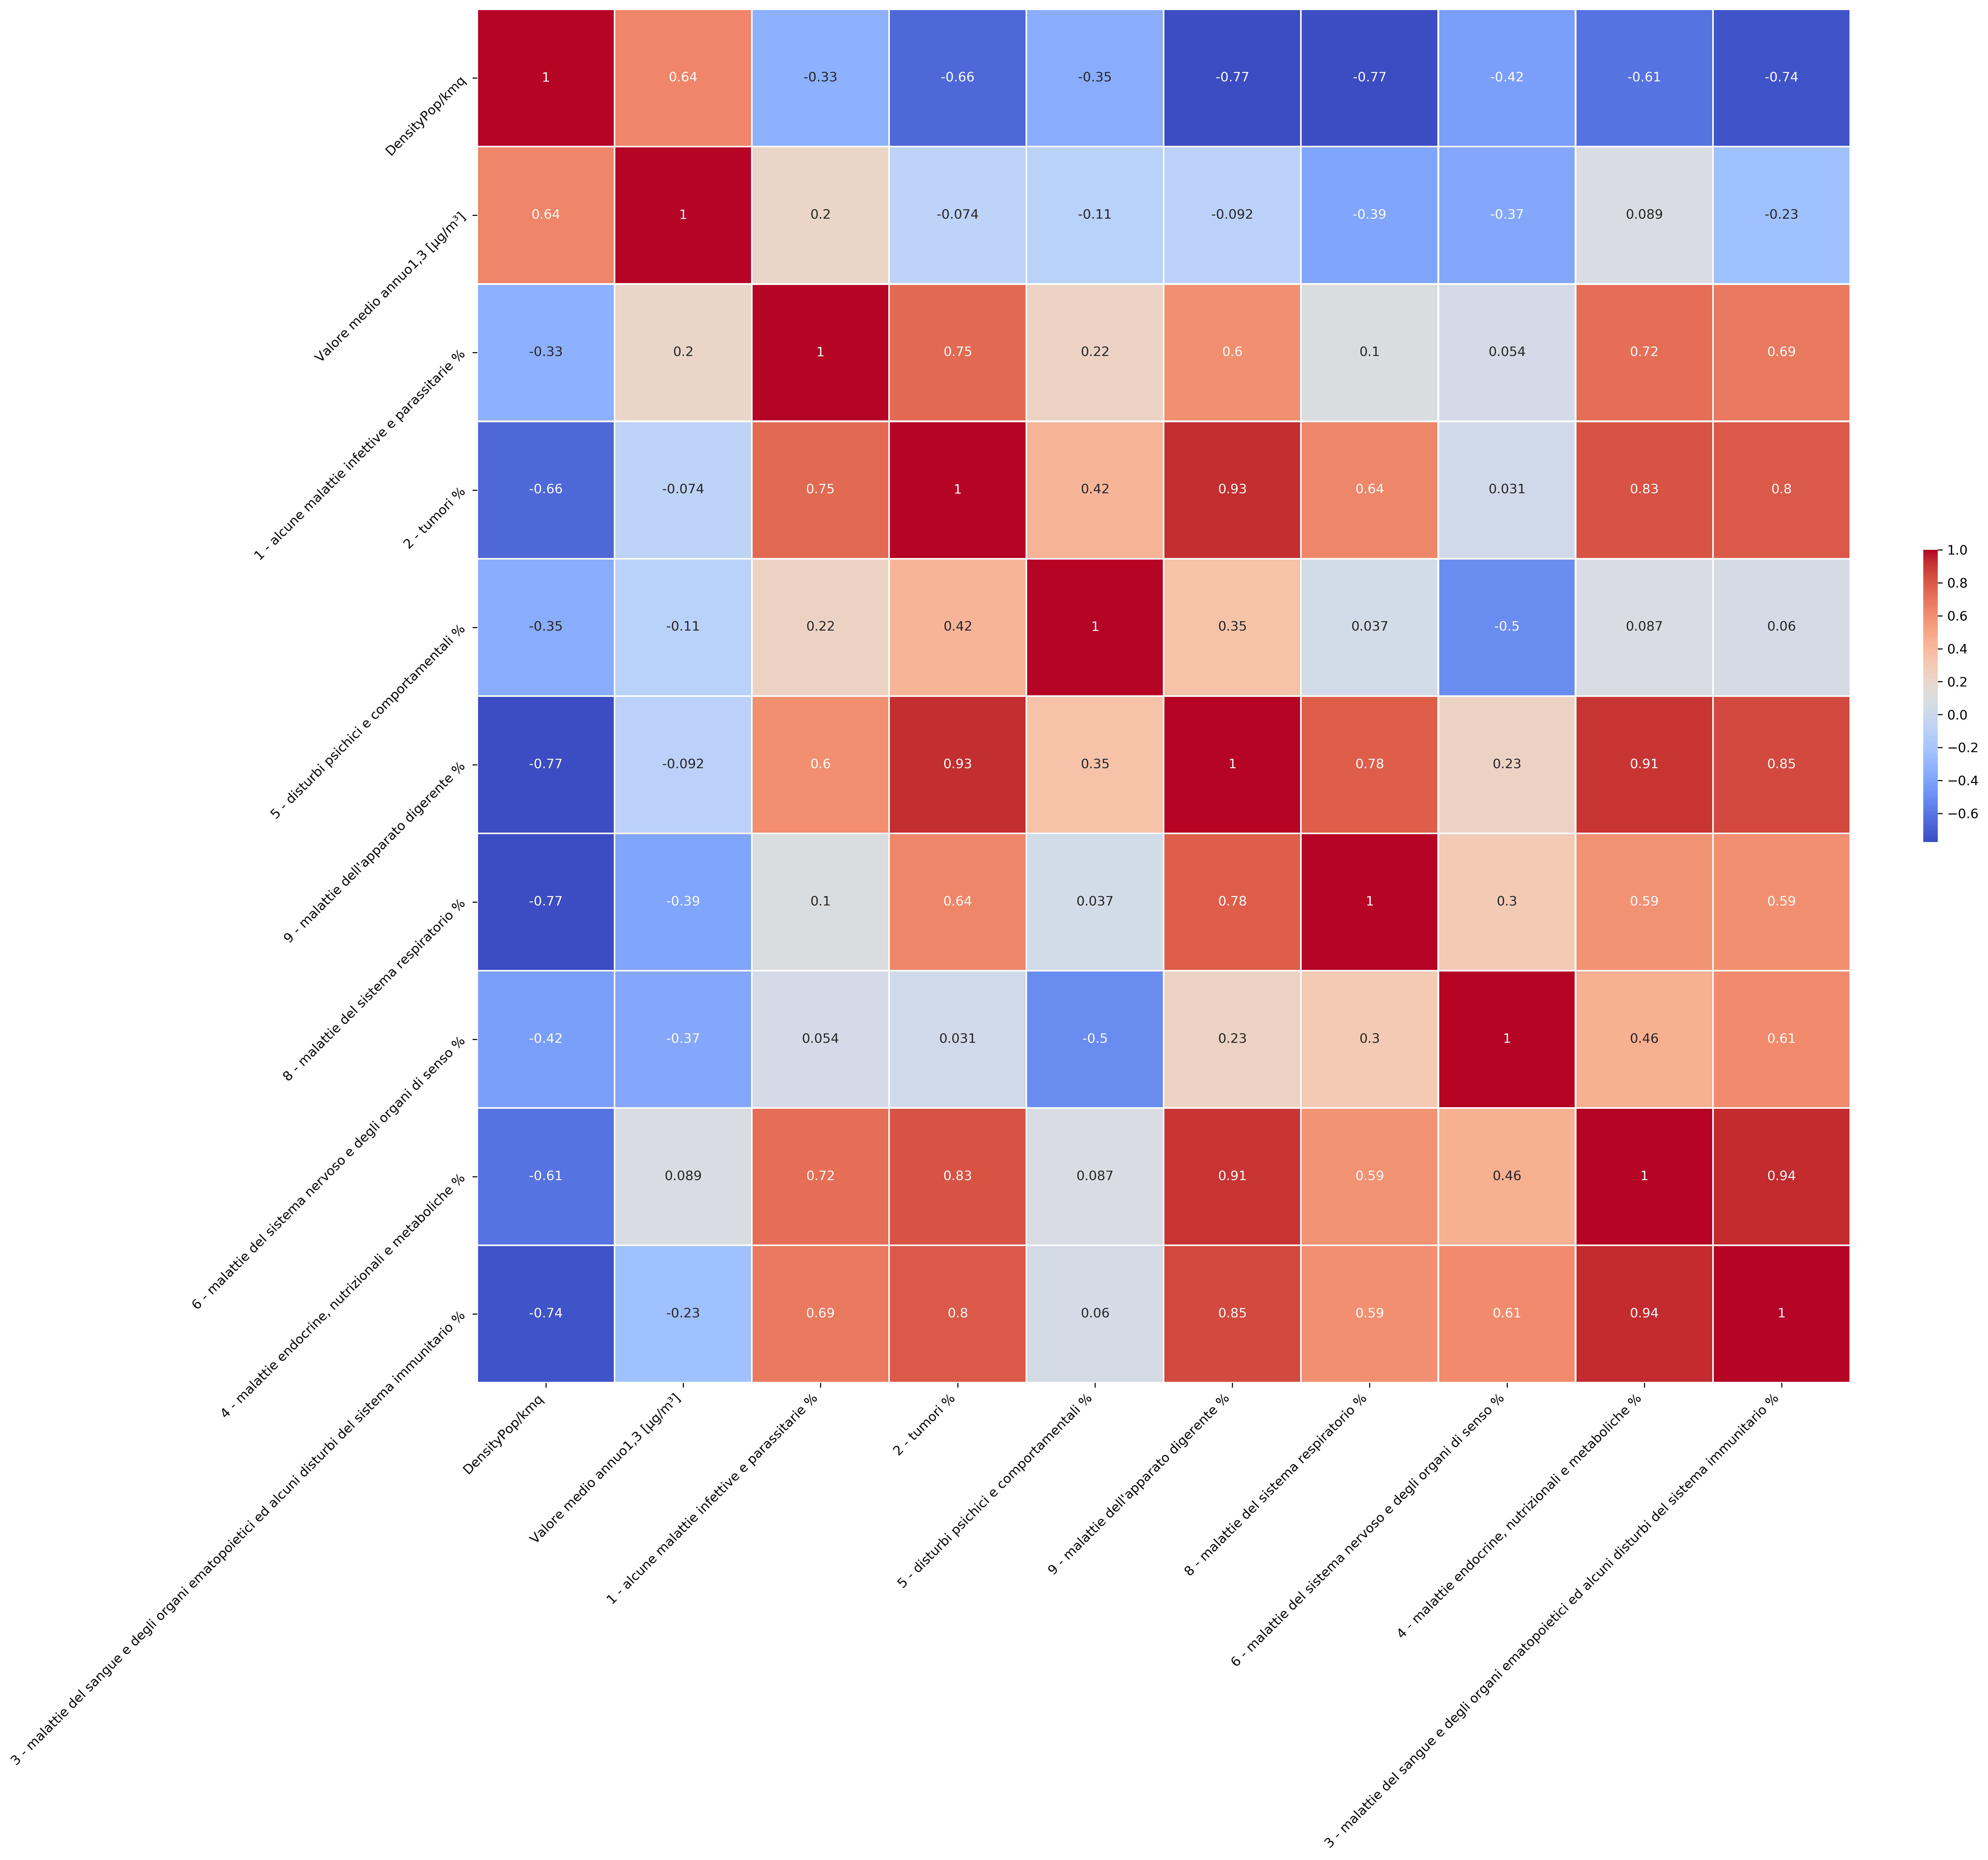

In [59]:
plt.figure(figsize=(20,20), dpi=300)
g = sns.heatmap(
    province.iloc[province[province.Regione=='Veneto'].index,[8,19,26,27,28,29,30,31,32,33]].corr(),
    cmap='coolwarm',
    square=True,
    annot=True,
    cbar_kws={'fraction' : 0.01},
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0.5, 'DensityPop/kmq'),
 Text(0, 1.5, '75° percentile2 [µg/m3]/ Popolazione'),
 Text(0, 2.5, '1 - alcune malattie infettive e parassitarie %'),
 Text(0, 3.5, '2 - tumori %'),
 Text(0, 4.5, '5 - disturbi psichici e comportamentali %'),
 Text(0, 5.5, "9 - malattie dell'apparato digerente %"),
 Text(0, 6.5, '8 - malattie del sistema respiratorio %'),
 Text(0, 7.5, '6 - malattie del sistema nervoso e degli organi di senso %'),
 Text(0, 8.5, '4 - malattie endocrine, nutrizionali e metaboliche %'),
 Text(0, 9.5, '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %')]

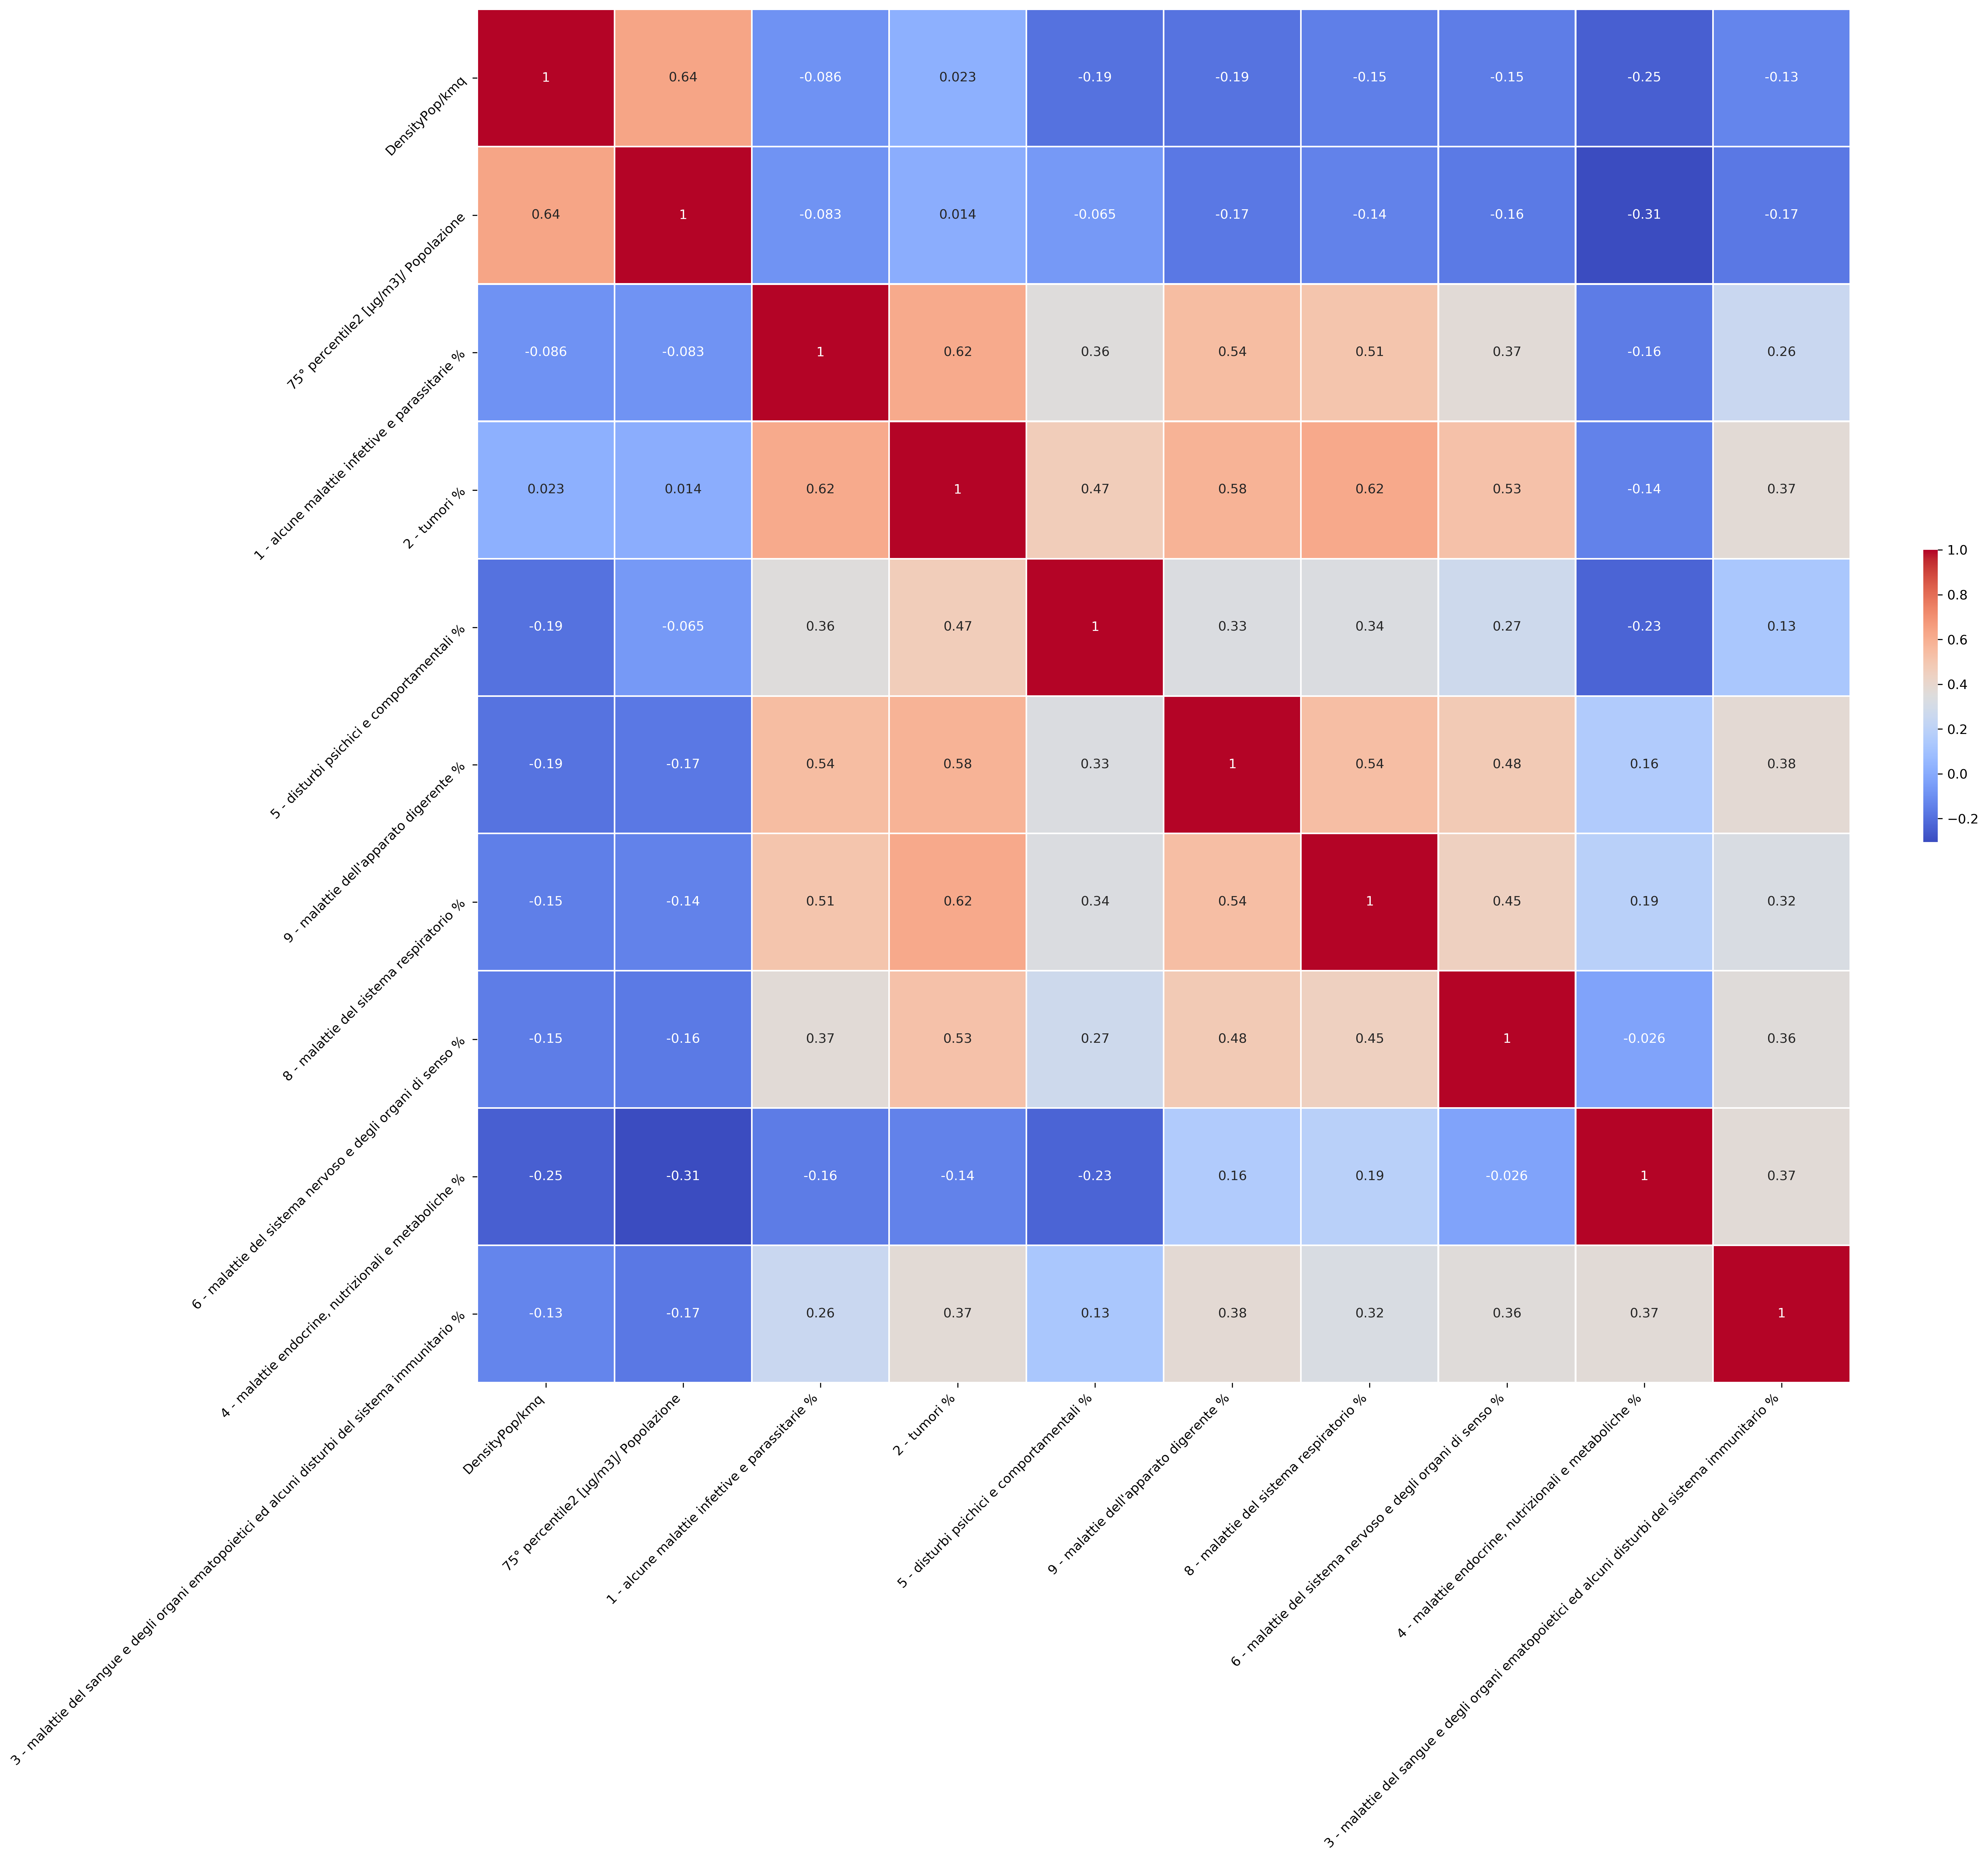

In [60]:

plt.figure(figsize=(20,20), dpi=300)
g = sns.heatmap(
    province.iloc[:,[8,24,26,27,28,29,30,31,32,33]].corr(), 
    square=True,
    annot=True,
    cbar_kws={'fraction' : 0.01},
    cmap='coolwarm',
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')


In [62]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5)

In [63]:
province.columns

Index(['index', 'Territorio_x', 'ITTER107', 'Superficie/kmq', 'Morti',
       'Popolazione_x', 'MeanAge', 'PercOver65', 'DensityPop/kmq',
       '7 - malattie del sistema circolatorio',
       '1 - alcune malattie infettive e parassitarie', '2 - tumori',
       '5 - disturbi psichici e comportamentali',
       '9 - malattie dell'apparato digerente',
       '8 - malattie del sistema respiratorio',
       '6 - malattie del sistema nervoso e degli organi di senso',
       '4 - malattie endocrine, nutrizionali e metaboliche',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario',
       'Regione', 'Valore medio annuo1,3 [µg/m³]', '50° percentile1 [µg/m3]',
       '75° percentile2 [µg/m3]', 'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tu

In [64]:
p = province.loc[:, ['Territorio_x', 'Regione', 'Superficie/kmq', 'MeanAge', 'DensityPop/kmq','50° percentile1 [µg/m3]',
       '75° percentile2 [µg/m3]', 'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tumori %',
       '5 - disturbi psichici e comportamentali %',
       "9 - malattie dell'apparato digerente %",
       '8 - malattie del sistema respiratorio %',
       '6 - malattie del sistema nervoso e degli organi di senso %',
       '4 - malattie endocrine, nutrizionali e metaboliche %',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %']]

In [65]:
p.head()

Territorio_x   Regione  Superficie/kmq  MeanAge  DensityPop/kmq  \
0      Agrigento   Sicilia       3052.8193     43.4           145.0   
1    Alessandria  Piemonte       3558.7845     47.8           120.0   
2         Ancona    Marche       1963.2132     45.7           242.0   
3         Arezzo   Toscana       3232.9925     46.0           107.0   
4  Ascoli Piceno    Marche       1228.1883     46.0           171.0   

   50° percentile1 [µg/m3]  75° percentile2 [µg/m3]  \
0                13.900000                20.000000   
1                17.000000                36.000000   
2                11.266667                17.820833   
3                10.000000                15.000000   
4                12.100000                16.700000   

   Valore medio annuo1,3 [µg/m³]/ Popolazione  \
0                                   6630735.0   
1                                  11093108.0   
2                                   7111860.0   
3                                   4476862.0   
4                                   2722850.0   

   50° percentile1 [µg/m3]/ Popolazione  75° percentile2 [µg/m3]/ Popolazione  \
0                          6.144481e+06                          8.840980e+06   
1                          7.253186e+06                          1.535969e+07   
2                          5.341797e+06                          8.449285e+06   
3                          3.443740e+06                          5.165610e+06   
4                          2.534345e+06                          3.497815e+06   

   7 - malattie del sistema circolatorio %  \
0                                 0.447462   
1                                 0.564152   
2                                 0.444609   
3                                 0.421344   
4                                 0.429697   

   1 - alcune malattie infettive e parassitarie %  2 - tumori %  \
0                                        0.009275      0.268748   
1                                        0.031876      0.388602   
2                                        0.029317      0.325442   
3                                        0.025844      0.280799   
4                                        0.040582      0.296491   

   5 - disturbi psichici e comportamentali %  \
0                                   0.040041   
1                                   0.070783   
2                                   0.049987   
3                                   0.035717   
4                                   0.062545   

   9 - malattie dell'apparato digerente %  \
0                                0.025789   
1                                0.047110   
2                                0.048300   
3                                0.034555   
4                                0.045834   

   8 - malattie del sistema respiratorio %  \
0                                 0.078951   
1                                 0.107346   
2                                 0.097232   
3                                 0.101053   
4                                 0.109334   

   6 - malattie del sistema nervoso e degli organi di senso %  \
0                                           0.043660            
1                                           0.075939            
2                                           0.093225            
3                                           0.069982            
4                                           0.054428            

   4 - malattie endocrine, nutrizionali e metaboliche %  \
0                                           0.085963      
1                                           0.059767      
2                                           0.051252      
3                                           0.056334      
4                                           0.053951      

   3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %  
0                                           0.004977                                              

In [66]:
model.fit(p.iloc[:,2:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
p['lab']= model.labels_

C:\Users\Max\anaconda3\envs\base2\lib\site-packages\seaborn\axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


<Figure size 432x288 with 0 Axes>

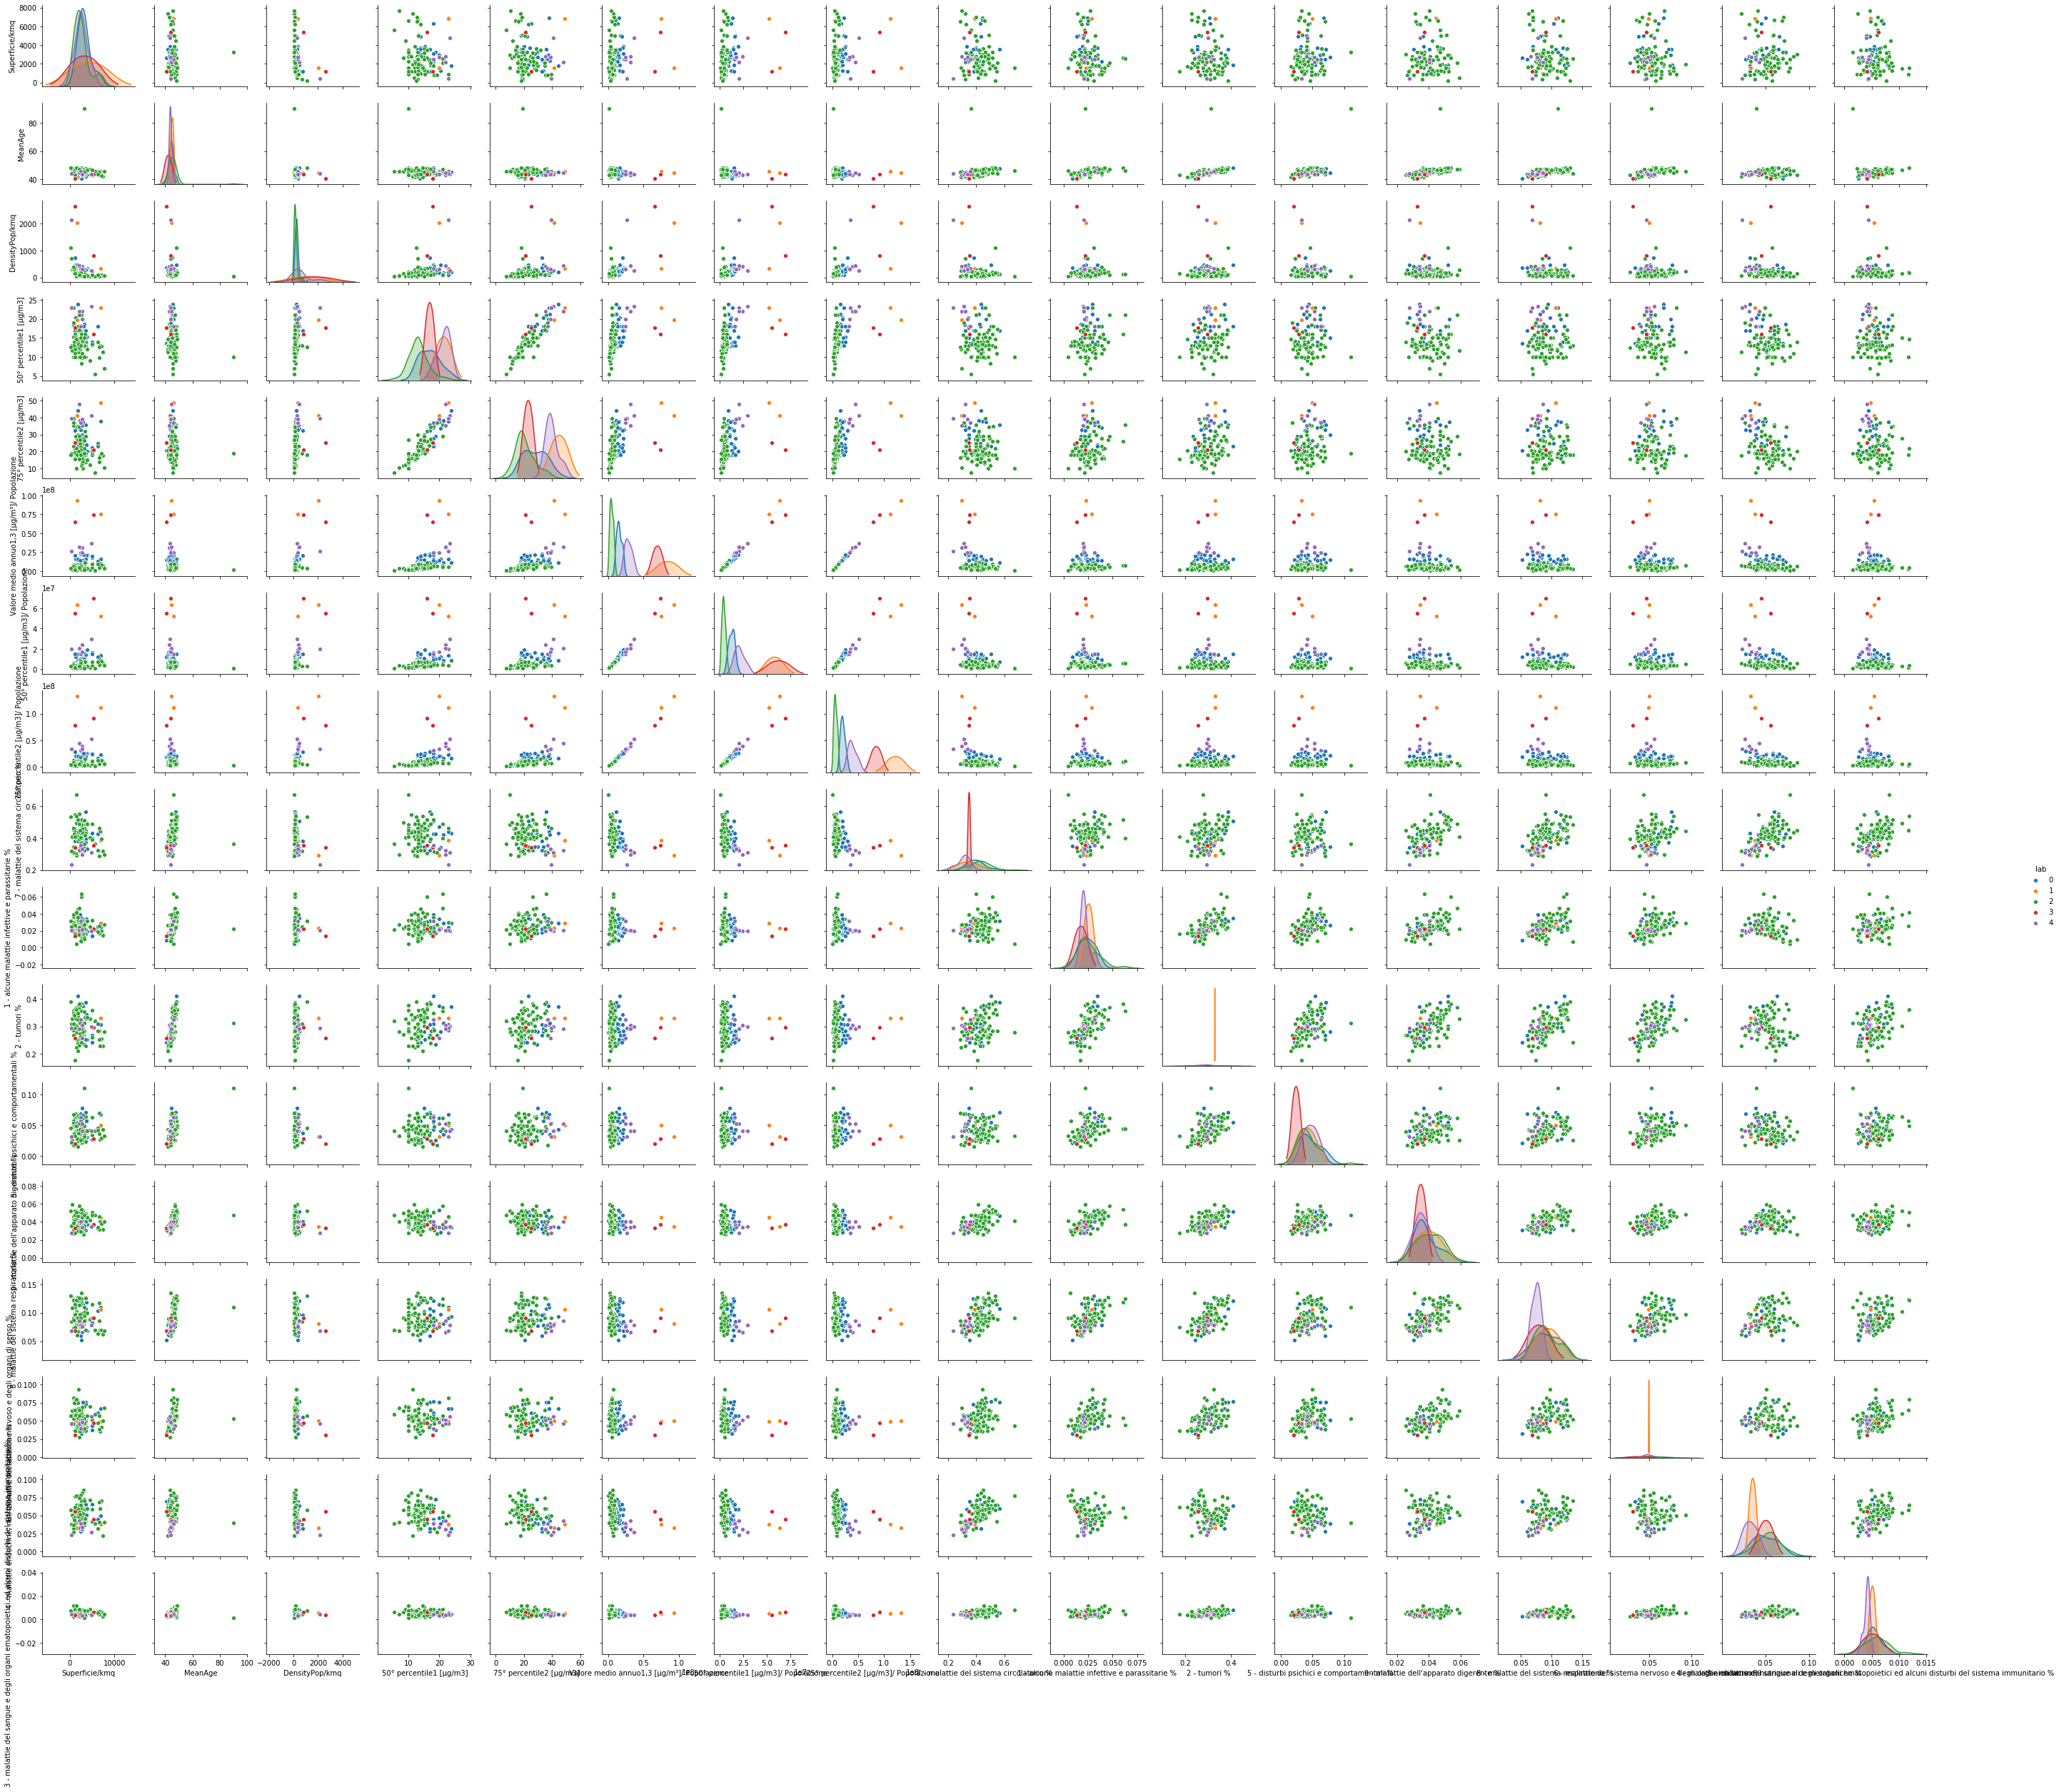

In [68]:
fig = plt.figure()
g = sns.pairplot(data=p[:-1], hue='lab')



In [76]:
province.columns

Index(['index', 'Territorio_x', 'ITTER107', 'Superficie/kmq', 'Morti',
       'Popolazione_x', 'MeanAge', 'PercOver65', 'DensityPop/kmq',
       '7 - malattie del sistema circolatorio',
       '1 - alcune malattie infettive e parassitarie', '2 - tumori',
       '5 - disturbi psichici e comportamentali',
       '9 - malattie dell'apparato digerente',
       '8 - malattie del sistema respiratorio',
       '6 - malattie del sistema nervoso e degli organi di senso',
       '4 - malattie endocrine, nutrizionali e metaboliche',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario',
       'Regione', 'Valore medio annuo1,3 [µg/m³]', '50° percentile1 [µg/m3]',
       '75° percentile2 [µg/m3]', 'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tu

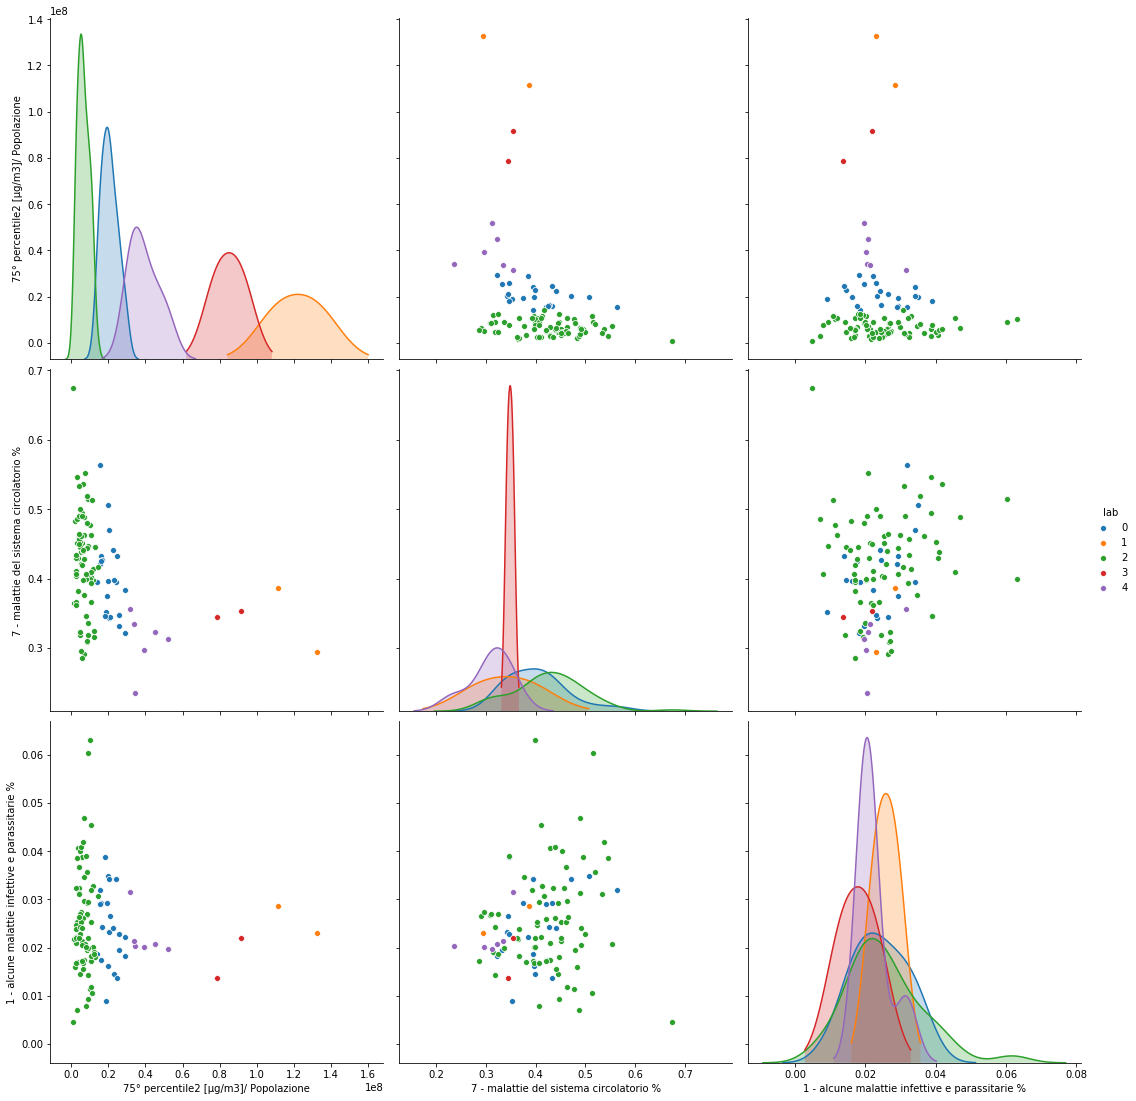

In [69]:
g = sns.pairplot(data=p.loc[:,['75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %','lab']], hue='lab', height=5,)


In [70]:


p.columns

Index(['Territorio_x', 'Regione', 'Superficie/kmq', 'MeanAge',
       'DensityPop/kmq', '50° percentile1 [µg/m3]', '75° percentile2 [µg/m3]',
       'Valore medio annuo1,3 [µg/m³]/ Popolazione',
       '50° percentile1 [µg/m3]/ Popolazione',
       '75° percentile2 [µg/m3]/ Popolazione',
       '7 - malattie del sistema circolatorio %',
       '1 - alcune malattie infettive e parassitarie %', '2 - tumori %',
       '5 - disturbi psichici e comportamentali %',
       '9 - malattie dell'apparato digerente %',
       '8 - malattie del sistema respiratorio %',
       '6 - malattie del sistema nervoso e degli organi di senso %',
       '4 - malattie endocrine, nutrizionali e metaboliche %',
       '3 - malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario %',
       'lab'],
      dtype='object')

In [71]:
p.groupby('lab').max().sort_values('Valore medio annuo1,3 [µg/m³]/ Popolazione', ascending=False)

Territorio_x   Regione  Superficie/kmq  MeanAge  DensityPop/kmq  \
lab                                                                   
1         Torino  Piemonte       6826.9080     45.9          2043.0   
3           Roma     Lazio       5363.2160     43.9          2635.0   
4        Vicenza    Veneto       4785.4824     45.9          2143.0   
0         Verona    Veneto       6894.8277     48.3           743.0   
2        Viterbo    Veneto       7691.7494     90.2          1104.0   

     50° percentile1 [µg/m3]  75° percentile2 [µg/m3]  \
lab                                                     
1                  23.000000                49.000000   
3                  17.787500                25.308333   
4                  23.400000                48.000000   
0                  23.799999                44.400002   
2                  23.000000                39.400000   

     Valore medio annuo1,3 [µg/m³]/ Popolazione  \
lab                                               
1                                    93327829.0   
3                                    74013546.0   
4                                    36617662.0   
0                                    22149300.0   
2                                    10773576.0   

     50° percentile1 [µg/m3]/ Popolazione  \
lab                                         
1                            6.372038e+07   
3                            6.965981e+07   
4                            2.954667e+07   
0                            1.920981e+07   
2                            9.252607e+06   

     75° percentile2 [µg/m3]/ Popolazione  \
lab                                         
1                            1.325899e+08   
3                            9.142850e+07   
4                            5.189606e+07   
0                            2.923708e+07   
2                            1.436477e+07   

     7 - malattie del sistema circolatorio %  \
lab                                            
1                                   0.386328   
3                                   0.353673   
4                                   0.355506   
0                                   0.564152   
2                                   0.674786   

     1 - alcune malattie infettive e parassitarie %  2 - tumori %  \
lab                                                                 
1                                          0.028536      0.330588   
3                                          0.021981      0.297652   
4                                          0.031489      0.326710   
0                                          0.038874      0.410907   
2                                          0.063119      0.389463   

     5 - disturbi psichici e comportamentali %  \
lab                                              
1                                     0.049828   
3                                     0.028114   
4                                     0.062626   
0                                     0.078332   
2                                     0.110338   

     9 - malattie dell'apparato digerente %  \
lab                                           
1                                  0.044955   
3                                  0.037095   
4                                  0.040385   
0                                  0.053175   
2                                  0.059425   

     8 - malattie del sistema respiratorio %  \
lab                                            
1                                   0.106416   
3                                   0.090520   
4                                   0.085872   
0                                   0.124800   
2                                   0.134482   

     6 - malattie del sistema nervoso e degli organi di senso %  \
lab                                                               
1                                             0.049810            
3                                             0.046902            
4        

In [72]:
p.loc[p.lab.apply(lambda x: x in [3,4]),:]

Territorio_x    Regione  Superficie/kmq  MeanAge  \
11                 Bergamo  Lombardia       2754.8638     43.1   
15                 Brescia  Lombardia       4785.4824     43.5   
56   Monza e della Brianza  Lombardia        405.4079     44.1   
57                  Napoli   Campania       1178.9351     40.7   
61                  Padova     Veneto       2144.1222     44.5   
80                    Roma      Lazio       5363.2160     43.9   
100                Venezia     Veneto       2472.8823     45.9   
105                Vicenza     Veneto       2722.4494     43.8   

     DensityPop/kmq  50° percentile1 [µg/m3]  75° percentile2 [µg/m3]  \
11            403.0                  22.0000                35.500000   
15            264.0                  23.4000                41.099998   
56           2143.0                  23.0000                39.400002   
57           2635.0                  17.7875                25.308333   
61            437.0                  22.0000                48.000000   
80            812.0                  16.0000                21.000000   
100           345.0                  18.0000                37.000000   
105           318.0                  20.0000                39.000000   

     Valore medio annuo1,3 [µg/m³]/ Popolazione  \
11                                   31078124.0   
15                                   36617662.0   
56                                   26065770.0   
57                                   65247126.0   
61                                   31833316.0   
80                                   74013546.0   
100                                  24773975.0   
105                                  24222296.0   

     50° percentile1 [µg/m3]/ Popolazione  \
11                           2.441853e+07   
15                           2.954667e+07   
56                           1.998376e+07   
57                           5.526587e+07   
61                           2.059803e+07   
80                           6.965981e+07   
100                          1.537695e+07   
105                          1.730164e+07   

     75° percentile2 [µg/m3]/ Popolazione  \
11                           3.940262e+07   
15                           5.189606e+07   
56                           3.423305e+07   
57                           7.863314e+07   
61                           4.494115e+07   
80                           9.142850e+07   
100                          3.160818e+07   
105                          3.373820e+07   

     7 - malattie del sistema circolatorio %  \
11                                  0.296324   
15                                  0.312352   
56                                  0.235481   
57                                  0.343932   
61                                  0.322982   
80                                  0.353673   
100                                 0.355506   
105                                 0.334766   

     1 - alcune malattie infettive e parassitarie %  2 - tumori %  \
11                                         0.020091      0.303532   
15                                         0.019720      0.300156   
56                                         0.020372      0.293373   
57                                         0.013647      0.257354   
61                                         0.020827      0.292863   
80                                         0.021981      0.297652   
100                                        0.031489      0.326710   
105                                        0.021270      0.258588   

     5 - disturbi psichici e comportamentali %  \
11                                    0.040903   
15                                    0.041341   
56                                    0.032111   
57                                    0.019826   
61                                    0.052869   
80                                    0.028114   
100                                   0.062626   
105                               

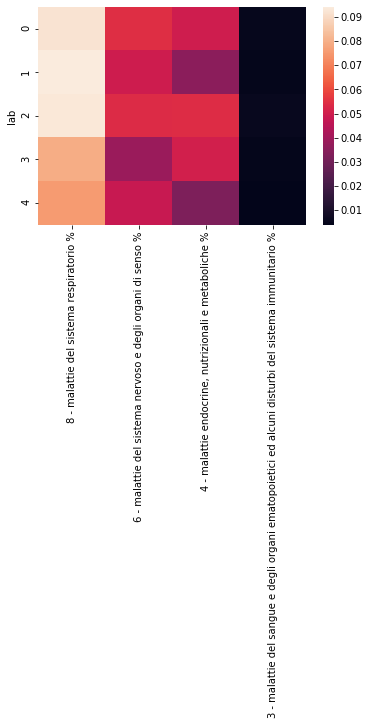

In [73]:
sns.heatmap(p.groupby('lab').mean().iloc[:,13:])

In [74]:
import geopandas as gpd

In [75]:
prov_json = gpd.read_file('Lib/prov_ok_2020.geojson')

In [ ]:
vis_prov = prov_json.merge(df, how='left', left_on='NOME_PRO', right_on = 'denominazione_provincia')

In [ ]:
vis_prov.dropna(inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
ax[0][0].set_title('Air Pollution PM2.5 - 50 percentile')
vis_prov.plot(column='airpoll_50perc', ax=ax[0][0], cmap='coolwarm', legend=True )

In [ ]:
p.Territorio_x.unique()

In [ ]:
import geopandas

In [ ]:


prov_json = json.load('Lib/province_lat_lon.json')